<div style="text-align: right"><b>Group 3</b></div>
<br>

<div style="text-align: right">
      Athipathi Janarth<br>
      Nishanth Prasath<br>
      Vikash Singh<br>
</div>

# Final Project
## Text Analysis of Harry Potter Series

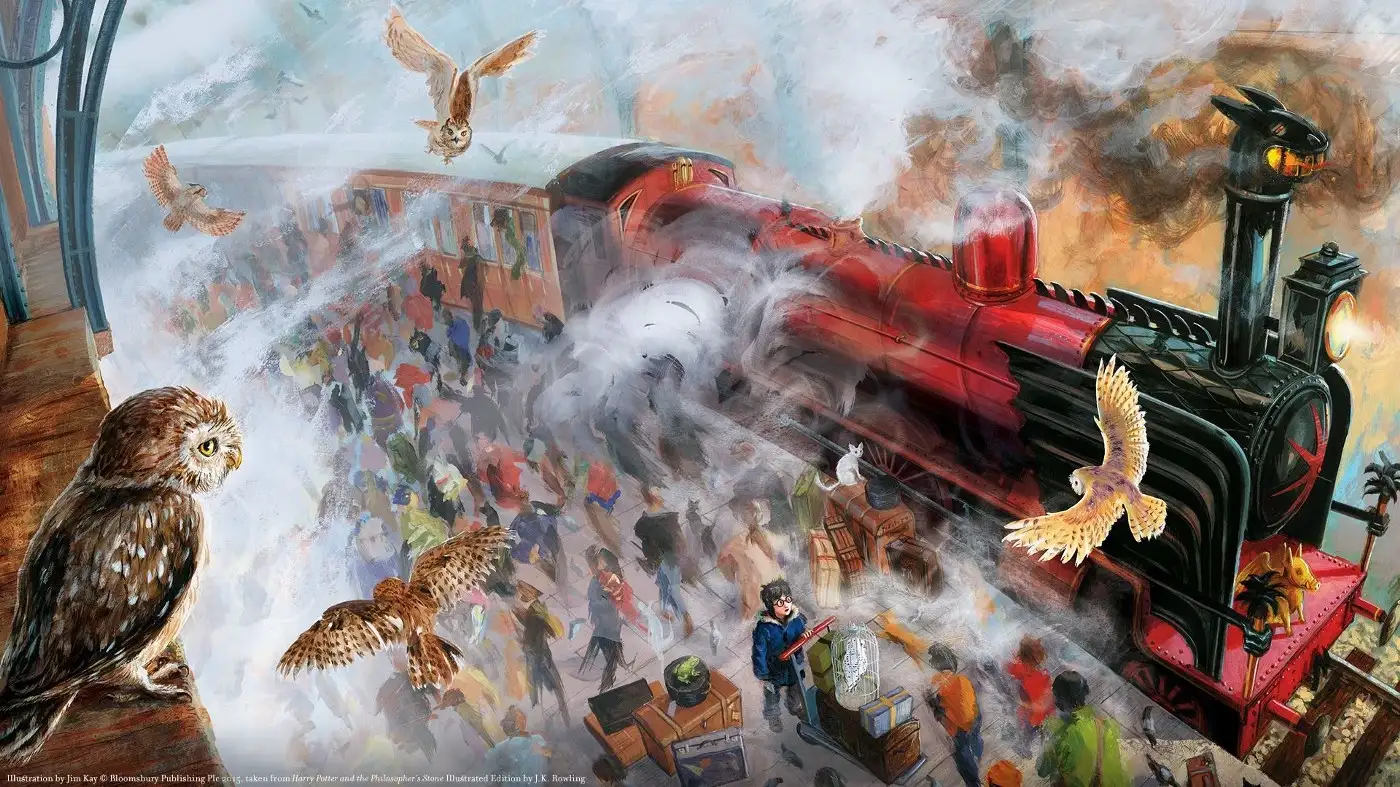

Libaries to install

pip install sumy</br>
pip install cython</br>
pip install pyLDAvis</br>
pip install wordcloud</br>
pip install tokenizers</br>
pip install scipy==1.8.1</br>
pip install vaderSentiment</br>
!pip install -U 'spacy[apple]'</br>
pip install -U typing-extensions</br>
pip install sentence-transformers</br>
!python -m spacy download en_core_web_sm</br>

### Importing Neccesary Packages

In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [1]:
import os
import re
import numpy as np
import pymc3 as pm
import collections
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#sns.set(rc={'figure.figsize':(11.7,8.27)})

### Reading DataSets

In [2]:
path = "/Users/athipathi/Data Science Methods and Technology/FinalProject"

In [3]:
#Reading the data from the folder

dirs = os.listdir(path)
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 3 - Prisoner of Azkaban.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 4 - The Goblet of Fire.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 7 - The Deathly Hallows .txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 5 - Harry Potter and the Order of the Phoenix.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 2 - The Chamber Of Secrets.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 6 - The Half Blood Prince.txt


In [4]:
#Replacing the escape sequence and spliting the books into paragraph

jk_sentences = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                text=input.read().replace("Mrs.","Mrs")#\n\n denotes there is a blank line in between paragraphs.
                text=text.replace("Mr.","Mr")
                paragraphs=text.split("\n\n")
                for paragraph in paragraphs:  
                    paragraph=paragraph.replace('\n'," ")
                    paragraph=paragraph.replace('\t'," ")
                    paragraph=paragraph.replace("\""," ")
                    sentences=paragraph.split(".")
                    jk_sentences.extend(sentences)
            
#print(jk_sentences)

/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 3 - Prisoner of Azkaban.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 4 - The Goblet of Fire.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 7 - The Deathly Hallows .txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 5 - Harry Potter and the Order of the Phoenix.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 2 - The Chamber Of Secrets.txt
/Users/athipathi/Data Science Methods and Technology/FinalProject/J. K. Rowling - Harry Potter 6 - The Half Blood Prince.txt


In [5]:
#Reordering the Books

book1start=jk_sentences.index("Harry Potter and the Sorcerer's Stone")
book2start=jk_sentences.index(" HARRY POTTER AND THE CHAMBER OF SECRETS")
book3start=jk_sentences.index("Harry Potter and the Prisoner of Azkaban")
book4start=jk_sentences.index("HARRY POTTER AND THE GOBLET OF FIRE")
book5start=jk_sentences.index("Harry Potter and the Order of the Phoenix")
book6start=jk_sentences.index("Harry Potter and the Half Blood Prince")
book7start=jk_sentences.index("Harry Potter and the Deathly Hallows ")
#print(book1start,book2start,book3start,book4start,book5start,book6start,book7start)
book1=jk_sentences[book1start:book5start]
book2=jk_sentences[book2start:book6start]
book3=jk_sentences[book3start:book4start]
book4=jk_sentences[book4start:book7start]
book5=jk_sentences[book5start:book2start]
book6=jk_sentences[book6start:]
book7=jk_sentences[book7start:book1start]
ordered_jk_sentences=[]
ordered_jk_sentences.extend(book1)
ordered_jk_sentences.extend(book2)
ordered_jk_sentences.extend(book3)
ordered_jk_sentences.extend(book4)
ordered_jk_sentences.extend(book5)
ordered_jk_sentences.extend(book6)
ordered_jk_sentences.extend(book7)

In [6]:
books=[book1,book2,book3,book4,book5,book6,book7]

In [7]:
potter_df = pd.DataFrame(ordered_jk_sentences, columns = ['Sentence'])

In [8]:
potter_df.drop(potter_df[potter_df['Sentence'] ==''].index, inplace = True)
potter_df.drop(potter_df[potter_df['Sentence'] ==' '].index, inplace = True)

In [9]:
potter_df['NumWords'] = potter_df['Sentence'].apply(lambda x: len(x.split()))
potter_df.drop(potter_df[potter_df['NumWords'] ==0].index, inplace = True)

In [10]:
potter_df.head(20)

Sentence  NumWords
0               Harry Potter and the Sorcerer's Stone         6
1                                         CHAPTER ONE         2
2                                   THE BOY WHO LIVED         4
3   Mr and Mrs Dursley, of number four, Privet Dri...        22
4    They were the last people you'd expect to be ...        23
6   Mr Dursley was the director of a firm called G...        13
7    He was a big, beefy man with hardly any neck,...        18
8    Mrs Dursley was thin and blonde and had nearl...        36
9    The Dursleys had a small son called Dudley an...        18
11  The Dursleys had everything they wanted, but t...        22
12   They didn't think they could bear it if anyon...        14
13   Mrs Potter was Mrs Dursley's sister, but they...        39
14   The Dursleys shuddered to think what the neig...        17
15   The Dursleys knew that the Potters had a smal...        18
16   This boy was another good reason for keeping ...        21
18  When Mr and Mrs Dursley woke up on the dull, g...        38
19   Mr Dursley hummed as he picked out his most b...        29
21  None of them noticed a large, tawny owl flutte...        12
23  At half past eight, Mr Dursley picked up his b...        38
24    Little tyke,  chortled Mr Dursley as he left...        10

### Pre-Processing Dataset

In [11]:
import nltk
from nltk.corpus import stopwords

custom_stopwords=stopwords.words('english')
custom_stopwords.extend(['said','yeh'])

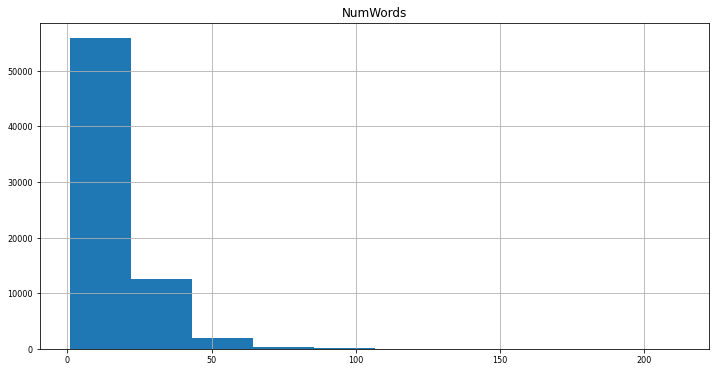

In [12]:
potter_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
#plt.title("Distribution of number of words in each sentence")

#### The above distribution shows that majority of the sentences i.e. more than 55k, have less than 25 words per sentence.

In [13]:
all_words = ''.join([word for word in potter_df['Sentence']]).replace('\n', ' ')

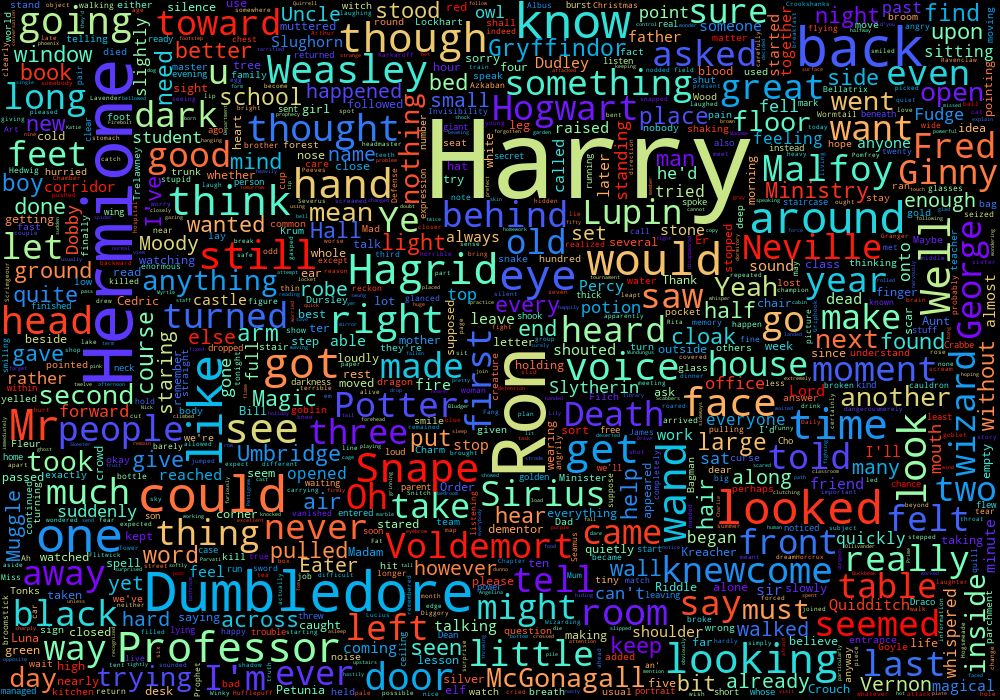

In [14]:
# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=700, max_font_size=110, background_color="black",colormap='rainbow', max_words=1000, contour_width=3, contour_color='red',collocations=False,stopwords=custom_stopwords)

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

#### The word cloud shows the most popular vocabs in the Harry Potter series which include Harry, Ron, Hermoine, Dumbledore, Professor among others.

In [15]:
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
potter_df['Sentence2'] = potter_df['Sentence'].apply(normalize_texts)
potter_df.head()
potter_df['Sentence2'] = potter_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

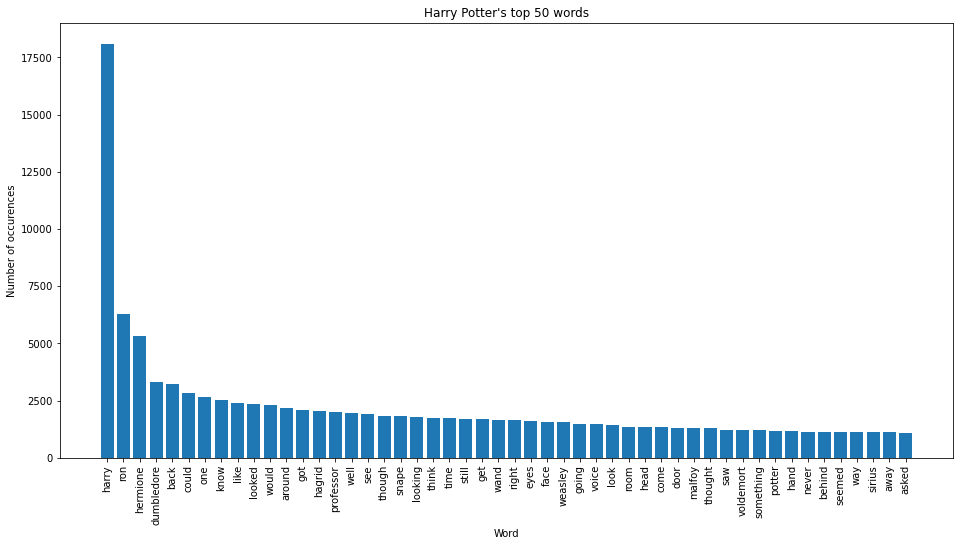

In [17]:
def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words=custom_stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(potter_df['Sentence2'], 50):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Harry Potter's top 50 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

#### Here we are plotting the frequency of the words and we can still see some stopwords included. So we need to remove those for the vocab to make more sense.

In [18]:
#adding custom stop words
custom_stopwords.extend(['back','know','like','see','look','asked','well','could','got','would','still','get','something','anything','nothing'])

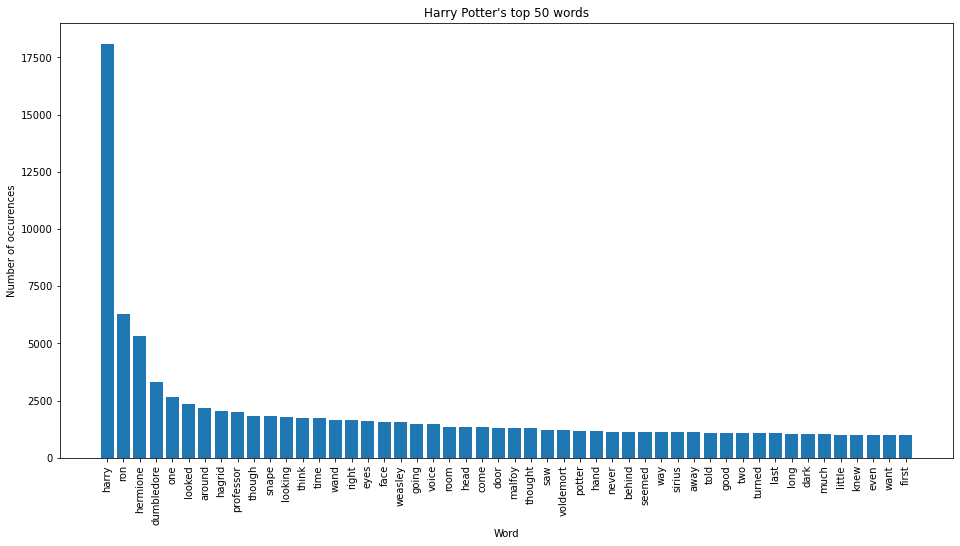

In [19]:
words = []
word_values = []
for i,j in get_top_n_words(potter_df['Sentence2'], 50):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Harry Potter's top 50 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

#### Since we have removed the additional stop words which can be seen above, we can go ahead and implement the language processing. 

In [20]:
import spacy
from nltk.tokenize import word_tokenize

nlp = spacy.load('en_core_web_sm')
nlp.max_length = 3908640
#stopwords = nlp.Defaults.stop_words


# Process `text` with Spacy NLP Parser
text = '. '.join(potter_df['Sentence2'])
#character_text=nlp(text)
text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in custom_stopwords]

text=' '.join(tokens_without_sw)
processed_text = nlp(text)



In [21]:
# How many sentences are in the book (Harry Potter)?
sentences = [s for s in processed_text.sents]
print(len(sentences))

# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
print(sentences[10:15])

69918
[think bear anyone found potters ., mrs potter mrs dursley sister met several years fact mrs dursley pretended sister sister good husband undursleyish possible ., dursleys shuddered think neighbors say potters arrived street ., dursleys knew potters small son never even seen ., boy another good reason keeping potters away want dudley mixing child .]


In [22]:
from collections import Counter, defaultdict

def find_character_occurences(doc):
    
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

print(find_character_occurences(processed_text)[:20])

[('harry', 7928), ('ron', 770), ('ron hermione', 489), ('harry potter', 312), ('harry ron', 273), ('harry ron hermione', 240), ('harry hermione', 216), ('ron .', 159), ('uncle', 124), ('fred george', 123), ('dobby', 122), ('ron harry', 104), ('harry look', 101), ('harry hear', 89), ('ginny', 86), ('dudley', 82), ('harry feel', 80), ('harry harry', 71), ('harry know', 71), ('james', 70)]


### We are analyzing the important characters and their occurences with each other. 

In [23]:
def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if 'you-know-who' in ent.text:
            print(ent)
        if 'snape' in ent.text or 'snape'==ent.text:
            character_offsets['snape'].append(ent.start)
        elif ent.label_ == 'PERSON':
            character_offsets[ent.lemma_].append(ent.start)
            
    return dict(character_offsets)

character_occurences = get_character_offsets(processed_text)

In [24]:
doc = processed_text

keywords = Counter()
for chunk in doc.noun_chunks:
    if nlp.vocab[chunk.lemma_].prob < - 8: # probablity value -8 is arbitrarily selected threshold
        keywords[chunk.lemma_] += 1


In [25]:
character,occurences=zip(*keywords.most_common(20))

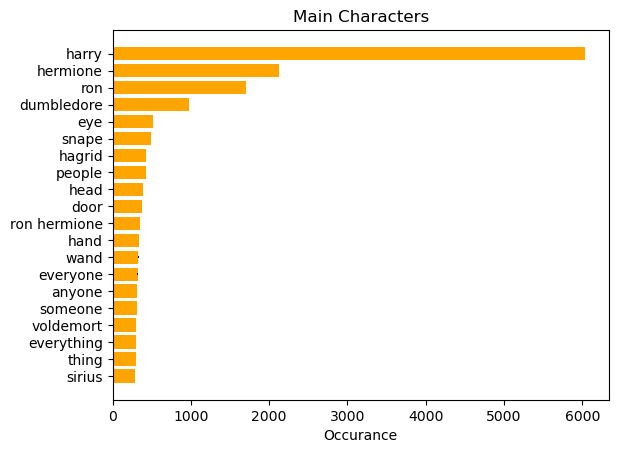

In [26]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = character
error = np.random.rand(len(character))

ax.barh(y_pos, occurences, xerr=error, align='center',color='orange')
ax.set_yticks(y_pos, labels=character)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Occurance')
ax.set_title('Main Characters')

plt.show()

#### The above analysis shows that the main characters and their occurence throughtout the Harry Potter series.  

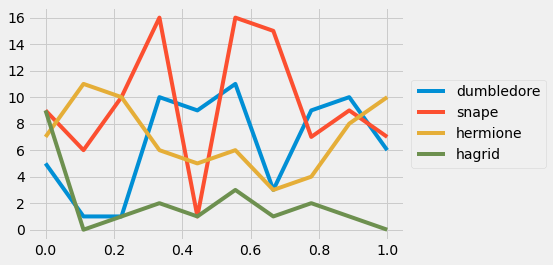

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
from cycler import cycler

NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'xxx': [123, 543, 4534], 'yyy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """ 
    x = [character_offsets[character_label] for character_label in character_labels] 
        
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()
        
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])
            
        plt.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_character_timeseries(character_occurences, ['dumbledore', 'snape','hermione','hagrid'])

#### Relationship between hermoine, snape, hagrid and dumbledore. 
As we know the 4 characters occur throughout the series and share many encounters which can be seen in the above plot.

## Text  Rank

In [ ]:
bert_embeddings = model.encode(ordered_jk_sentences[:len(book1)])
bert_embeddings.shape

#### Here we have created the embeddings.

In [27]:
#Print the embeddings
for i, (sentence, embedding) in enumerate(zip(jk_sentences, bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

Sentence: Harry Potter and the Prisoner of Azkaban
Embedding: [-4.75800075e-02  2.53096540e-02 -5.52318916e-02  2.31233221e-02
 -1.43231377e-01  1.41439522e-02 -1.58191682e-03 -1.99290644e-02
  3.27499248e-02 -5.54056577e-02 -1.55468201e-02 -7.19559519e-03
 -3.95794585e-02  4.32376899e-02 -7.47554824e-02 -6.80671856e-02
  2.94644125e-02  5.69446087e-02  6.51557697e-03 -3.43379602e-02
  3.64228673e-02 -2.13267189e-02  3.92036624e-02 -2.12667380e-02
  2.44499072e-02  1.41321272e-02  2.93040853e-02 -1.11972522e-02
 -5.21710590e-02 -9.91368145e-02 -6.26695007e-02 -1.44264847e-02
 -9.09274369e-02 -2.84881778e-02 -1.02886543e-01  8.56478792e-03
 -2.73602009e-02  9.41440538e-02  5.99703938e-02 -2.06269529e-02
 -5.79547733e-02 -4.20141704e-02 -6.38519004e-02  6.97315559e-02
 -8.28390475e-03 -3.47696878e-02 -1.05730798e-02 -2.44367421e-02
 -2.30028741e-02 -1.51072517e-02 -9.35254036e-04  6.21195361e-02
 -1.03928126e-01 -1.74980331e-02  2.42386665e-02 -4.92026582e-02
 -2.82945614e-02 -4.79662567

In [28]:
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

0.2502259

#### Here we have calculated the cosine similarity which allows us to calculate the similarity matrix. 

In [29]:
bert_embeddings.shape

(9042, 384)

In [30]:
from tqdm import tqdm
# M = np.zeros((9042, 9042)) #1933
M = np.eye(9042)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

9042it [11:32, 13.05it/s]


In [31]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

#### Using the similarity matrix to rank the sentences.

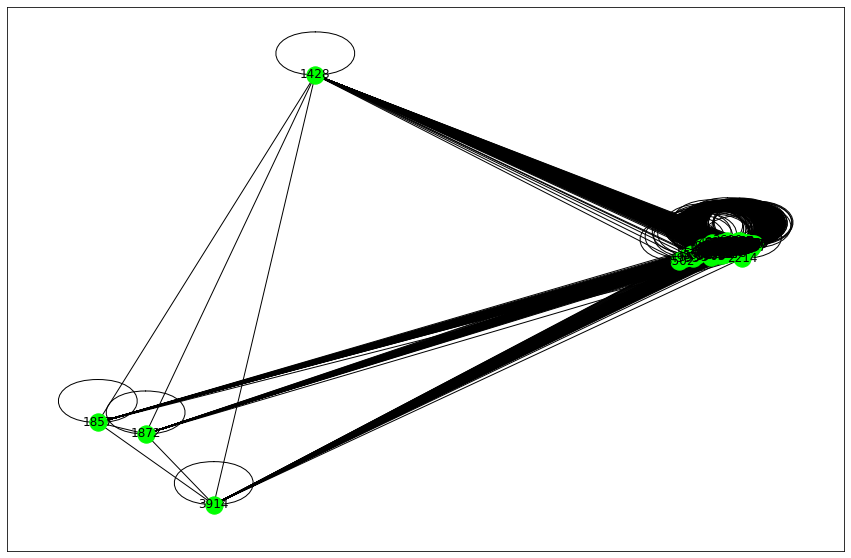

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 10))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [32]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

[(0.0001674852632721332, 9040),
 (0.0001674852632721332, 9039),
 (0.0001674852632721332, 9038),
 (0.0001674852632721332, 9037),
 (0.0001674852632721332, 9033),
 (0.0001674852632721332, 9031),
 (0.0001674852632721332, 9029),
 (0.0001674852632721332, 9027),
 (0.0001674852632721332, 9023),
 (0.0001674852632721332, 9021)]

#### In the plot above we see many overlapping rankings which is confirmed by the data too. Meaning this is not a good text ranking model and we need to revise our model.

#### Instead of ranking the sentences of a book, lets try seperating the book into chapters and try ranking them.

In [29]:
chapterindex=[]
for sentence in book1:
    if 'CHAPTER' in sentence:
        chapterindex.append(book1.index(sentence))

In [50]:
chapters=[]
for i in range(len(chapterindex)):
    if i < len(chapterindex)-1:
        #lst.append(book1[chapterindex[i]:chapterindex[i+1]])
        chapters.append(''.join(book1[chapterindex[i]:chapterindex[i+1]]))
    else:
        chapters.append(''.join(book1[chapterindex[i]:]))
        #lst.append(book1[chapterindex[i]:])

In [293]:
chapter_bert_embeddings = model.encode(chapters)
chapter_bert_embeddings.shape

(17, 384)

In [294]:
a_ = chapter_bert_embeddings[0]
b_ = chapter_bert_embeddings[1]
cos_sim_ = (a_ @ b_.T) / (np.linalg.norm(a_)*np.linalg.norm(b_))
cos_sim_

0.69530934

In [295]:
# M = np.zeros((9042, 9042)) #1933
M_ = np.eye(17)

for i,a in tqdm(enumerate(chapter_bert_embeddings)):
    for j,b in enumerate(chapter_bert_embeddings):
        if i != j:
            M_[i,j] = (a_ @ b_.T) / (np.linalg.norm(a_)*np.linalg.norm(b_))

17it [00:00, 1376.75it/s]


In [296]:
import networkx

similarity_graph_ = networkx.from_numpy_array(M_)
similarity_graph_

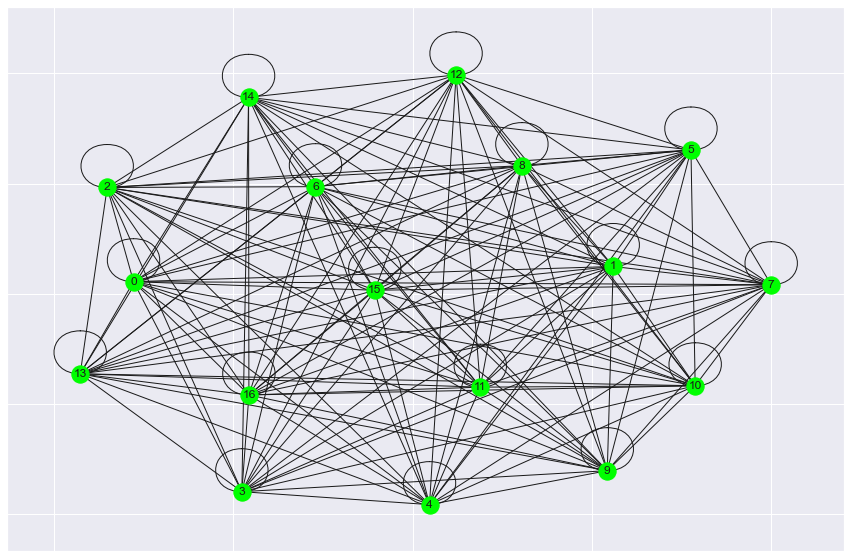

In [297]:
plt.figure(figsize=(15, 10))
networkx.draw_networkx(similarity_graph_, node_color='lime')

In [298]:
scores_ = networkx.pagerank(similarity_graph_)
nx_ranked_sentences_ = sorted(((score, index) for index, score 
                                            in scores_.items()), 
                          reverse=True)
nx_ranked_sentences_

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


[(0.05882352941176469, 15),
 (0.05882352941176469, 13),
 (0.05882352941176469, 11),
 (0.05882352941176469, 9),
 (0.058823529411764684, 16),
 (0.058823529411764684, 14),
 (0.058823529411764684, 12),
 (0.058823529411764684, 10),
 (0.058823529411764684, 8),
 (0.058823529411764684, 7),
 (0.058823529411764684, 6),
 (0.058823529411764684, 5),
 (0.058823529411764684, 4),
 (0.058823529411764684, 3),
 (0.058823529411764684, 2),
 (0.058823529411764684, 1),
 (0.058823529411764684, 0)]

## LDA 

<b>Latent Dirichlet Allocation</b>, is a generative probabilistic topic model that explains a set of observations through unobserved groups. The model consists of two groups; the first group is the probability of selecting a particular word in the corpus when sampling from a particular topic, and the second group is the probability of selecting a particular topic when sampling from a particular document. The LDA is basically just like an algorithmic <b>Sorting Hat</b>.

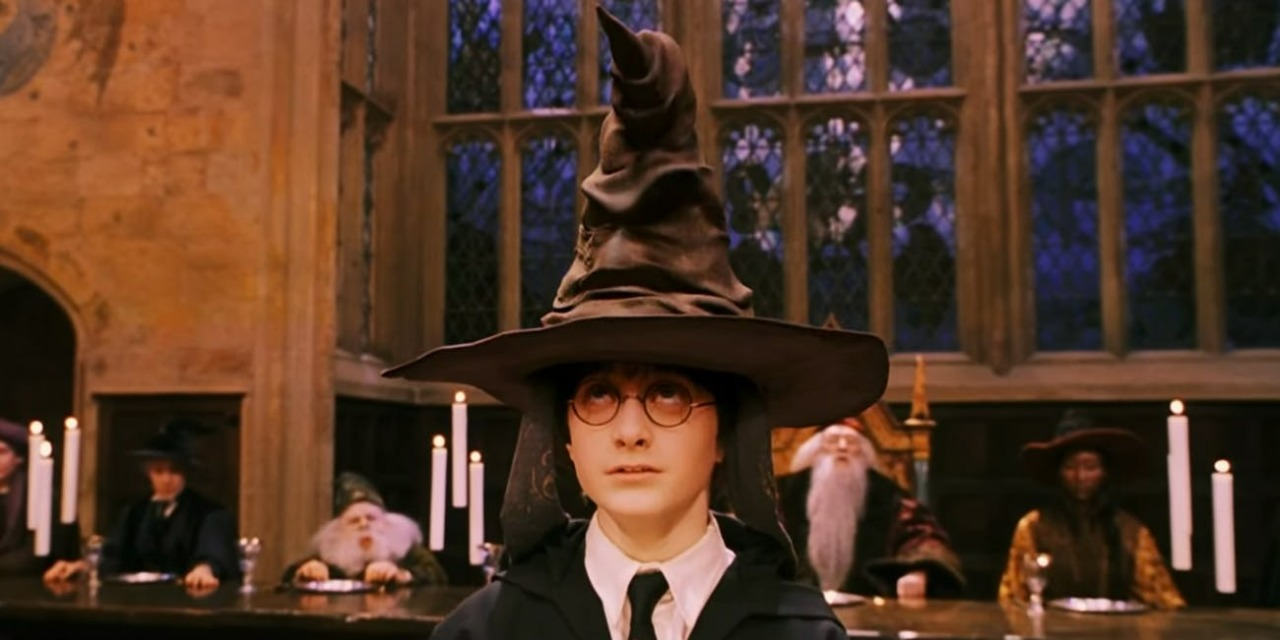

In [29]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
     

In [30]:
# Tokenize
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [31]:
jk_words= list(sent_to_words(ordered_jk_sentences))

In [32]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(jk_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[jk_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


#### Remove Stopwords, Make Bigrams and Lemmatize

In [76]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in custom_stopwords] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc ])
    return texts_out

In [34]:
# Remove Stop Words
jk_words_nonStop_words = remove_stopwords(jk_words)

# Form Bigrams
jk_words_bigrams = make_bigrams(jk_words_nonStop_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
jk_lemmatized = lemmatization(jk_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [ ]:
jk_lemmatized

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus

In [35]:
# Create Dictionary
id2word = corpora.Dictionary(jk_lemmatized)

# Create Corpus
texts = jk_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[3])

[(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


In [36]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

[[('harry', 1), ('potter', 1), ('sorcerer_stone', 1)],
 [('chapter', 1), ('one', 1)],
 [('boy', 1), ('live', 1)],
 [('dursley', 1),
  ('four', 1),
  ('mr', 1),
  ('mrs', 1),
  ('much', 1),
  ('normal', 1),
  ('number', 1),
  ('perfectly', 1),
  ('privet_drive', 1),
  ('proud', 1),
  ('say', 1),
  ('thank', 1)],
 [('expect', 1),
  ('hold', 1),
  ('involve', 1),
  ('last', 1),
  ('mysterious', 1),
  ('nonsense', 1),
  ('people', 1),
  ('strange', 1)],
 [],
 [('dursley', 1),
  ('mr', 1),
  ('call', 1),
  ('director', 1),
  ('drill', 1),
  ('firm', 1),
  ('grunning', 1),
  ('make', 1)],
 [('although', 1),
  ('beefy', 1),
  ('big', 1),
  ('hardly', 1),
  ('large', 1),
  ('man', 1),
  ('mustache', 1),
  ('neck', 1)],
 [('dursley', 1),
  ('mrs', 1),
  ('much', 1),
  ('neck', 1),
  ('amount', 1),
  ('blonde', 1),
  ('come', 1),
  ('crane', 1),
  ('fence', 1),
  ('garden', 1),
  ('nearly', 1),
  ('neighbor', 1),
  ('spend', 1),
  ('spy', 1),
  ('thin', 1),
  ('time', 1),
  ('twice', 1),
  ('use

### Building the Topic Model
We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.
Chunksize is the number of documents to be used in each training chunk.
update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [37]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### View the topics in LDA model
The above LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic. You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.

In [38]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.227*"give" + 0.147*"shout" + 0.106*"floor" + 0.104*"window" + '
  '0.082*"shake" + 0.047*"bit" + 0.046*"past" + 0.041*"always" + '
  '0.030*"several" + 0.025*"none"'),
 (1,
  '0.248*"come" + 0.118*"boy" + 0.116*"thing" + 0.089*"happen" + 0.074*"live" '
  '+ 0.074*"whisper" + 0.063*"together" + 0.037*"start" + 0.026*"soon" + '
  '0.015*"sky"'),
 (2,
  '0.261*"go" + 0.150*"seem" + 0.138*"hear" + 0.136*"voice" + 0.098*"right" + '
  '0.075*"ground" + 0.056*"yes" + 0.013*"dear" + 0.012*"knock" + 0.000*"ron"'),
 (3,
  '0.177*"want" + 0.102*"toward" + 0.098*"keep" + 0.095*"great" + 0.086*"good" '
  '+ 0.069*"another" + 0.038*"thought" + 0.038*"everything" + 0.034*"new" + '
  '0.033*"suppose"'),
 (4,
  '0.289*"around" + 0.209*"head" + 0.118*"might" + 0.118*"sure" + 0.086*"call" '
  '+ 0.079*"second" + 0.000*"ron" + 0.000*"hermione" + 0.000*"voldemort" + '
  '0.000*"dumbledore"'),
 (5,
  '0.166*"else" + 0.112*"tiny" + 0.090*"thank" + 0.073*"edge" + 0.066*"fact" + '
  '0.065*"possible"

The top 10 keywords that contribute Topic 14: `harry`, `think`, `dead`, `stop`, `anyone`, `name`, `single`, `ron`, `hermione`, `dumbledore` and the weight of `harry` is 0.726. The weights reflect how important a keyword is to that topic.

#### Model Perplexity and Topic Coherence
A convenient measure to judge how good a given topic model is

In [39]:
# Compute Perplexity

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=jk_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

print('\nCoherence Score: ', coherence_lda)


Perplexity:  -22.9152070671833

Coherence Score:  0.26011590039467636


### Visualize the topics-keywords
Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords.

In [40]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/athipathi/opt/anac

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version

In [50]:
pyLDAvis.display(vis)

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic. A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

#### Optimizing Coherence Scores

Mallet (MAchine Learning for LanguagE Toolkit). The difference between Mallet and Gensim’s standard LDA is that Gensim uses a Variational Bayes sampling method which is faster but less precise than Mallet’s Gibbs Sampling.

In [42]:
mallet_path = '/Users/athipathi/opt/anaconda3/bin/mallet-2.0.8/bin/mallet' 

In [43]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 93
total tokens: 418280
<10> LL/token: -10.70275
<20> LL/token: -10.37198
<30> LL/token: -10.1631
<40> LL/token: -10.00095

0	2.5	harry ron dumbledore face black mrs_weasley hair half wall foot hear hermione hurry dark corridor order chance top office wing 
1	2.5	harry door hermione hand ron eye open fall face step wand lie darkness floor silver scream wall front avoid hagrid 
2	2.5	harry umbridge professor dumbledore snape sirius ron sort leave defense thing james class dark_art father end muggle idea hermione speak 
3	2.5	harry ron wand floor malfoy make hand hold find moment open dudley wall face pull empty read hang hermione time 
4	2.5	harry hear magic school ron shout wizard bad hermione pass voldemort dumbledore feel dad snape night dangerous family witch death 
5	2.5	harry hermione ron time give face dementor tonk wear leave goblin make moment change quidditch sit bit bring mrs_weasley hundred 
6	2.5

<160> LL/token: -9.09087
<170> LL/token: -9.05859
<180> LL/token: -9.03484
<190> LL/token: -9.00742

0	2.5	long black hair room half corridor owl man window top wear stand low empty past hang hurry set gaze neck 
1	2.5	door open light floor fall wall front mouth step air scream leg desk forward silver vanish seize pain snake stone 
2	2.5	snape dumbledore sirius professor lupin umbridge fudge class good father speak idea teacher fight talk mother question trouble hope defense 
3	2.5	wand hand harry hold raise pull uncle_vernon dudley glass inside shoulder small draw tear aunt_petunia eye breath kitchen ready fill 
4	2.5	wizard great house boy dumbledore magic muggle bad life family witch live pass time dear man death young chance happen 
5	2.5	ron hermione harry time change notice cloak glance robe goblin tonk eat letter breakfast cut griphook bit thinking subject mrs_weasley 
6	2.5	harry stop professor_mcgonagall hermione put wait turn break bit mind silence ron call voice make wood ex

<310> LL/token: -8.82296
<320> LL/token: -8.81455
<330> LL/token: -8.80962
<340> LL/token: -8.81165

0	2.5	long black hair half man window wear stand owl top empty hang dark hat short neck silver thick line full 
1	2.5	open door light fall floor front mouth wall step scream leg hit desk stone throw foot seize fire forward air 
2	2.5	dumbledore snape sirius professor lupin umbridge fudge father class mother die speak question teacher fight expect memory talk trouble defense 
3	2.5	hand wand harry hold pull raise uncle_vernon dudley glass shoulder close cloak small draw kitchen pick aunt_petunia water ready breath 
4	2.5	wizard house boy magic great muggle life bad family witch dear live death young chance dumbledore big magical hogwart matter 
5	2.5	ron hermione harry spot eat common_room angrily cut goblin crookshank griphook glance breakfast loudly leave drink change practice lucky lavender 
6	2.5	harry stop professor_mcgonagall put bit break mind wait turn make talk time silence add 

<460> LL/token: -8.75379
<470> LL/token: -8.75191
<480> LL/token: -8.75126
<490> LL/token: -8.74637

0	2.5	long black hair half man wear owl top robe window stand silver dark hang hat short neck green woman thick 
1	2.5	door open light fall floor front mouth step wall scream ground forward close foot hit desk stone throw fire seize 
2	2.5	dumbledore snape sirius professor lupin umbridge die fudge father mother class teacher question understand speak fight memory note hurt defense 
3	2.5	hand wand hold pull raise point uncle_vernon harry dudley shoulder cloak hard small mutter ear draw pocket pick aunt_petunia glass 
4	2.5	wizard magic house boy great muggle life family witch dumbledore dear live place matter death young big bad love remain 
5	2.5	ron hermione harry eat angrily drink surprise crookshank breakfast griphook frown whisper common_room hastily library load lavender glance practice loudly 
6	2.5	harry make stop professor_mcgonagall mind turn break wait bit neville talk put si

<610> LL/token: -8.72279
<620> LL/token: -8.72078
<630> LL/token: -8.71515
<640> LL/token: -8.71441

0	2.5	long black hair half robe top wear man window silver glass green hang small hat short neck stand thick woman 
1	2.5	door open light fall floor front mouth wall step close scream fire forward hit ground throw stone burst snake foot 
2	2.5	dumbledore snape sirius professor lupin umbridge die fudge father mother speak class teacher question fight memory understand note hurt defense 
3	2.5	hand wand harry pull hold raise uncle_vernon dudley shoulder point hard cloak inside draw pocket small aunt_petunia mutter ear pick 
4	2.5	wizard house magic boy great ministry muggle dumbledore life family witch live young man dear big magical matter albus part 
5	2.5	ron hermione harry whisper eat surprise angrily drink crookshank griphook breakfast frown hastily loudly add library load sigh lavender worried 
6	2.5	harry stop make professor_mcgonagall neville put mind break talk turn bit expect si

<760> LL/token: -8.71504
<770> LL/token: -8.71065
<780> LL/token: -8.70972
<790> LL/token: -8.71062

0	2.5	long black hair robe top man wear stand small window glass cover silver green hang half hat neck short tiny 
1	2.5	door open light fall front floor close mouth step wall scream forward throw hit foot ground fire stone shut burst 
2	2.5	dumbledore snape sirius professor lupin umbridge fudge father speak mother class understand teacher question order note hurt die defense moody 
3	2.5	hand wand harry pull hold raise uncle_vernon point dudley shoulder cloak mutter put finger hard inside draw pocket aunt_petunia pick 
4	2.5	wizard house magic ministry great muggle life dumbledore place boy family witch live hogwart young big magical part albus minister 
5	2.5	ron hermione harry whisper add eat angrily ignore gasp drink crookshank griphook frown scabber library parvati lavender sigh breakfast hastily 
6	2.5	harry stop neville professor_mcgonagall make bit break mind talk turn put silen

<910> LL/token: -8.6935
<920> LL/token: -8.69563
<930> LL/token: -8.69352
<940> LL/token: -8.69538

0	2.5	long black hair top wear large man small stand robe glass cover silver green hang tiny hat short neck thick 
1	2.5	door open front light floor close fall mouth wall step fire scream hit ground forward throw stone shut vanish burst 
2	2.5	dumbledore snape sirius professor lupin umbridge speak fudge father mother answer order understand teacher question die class note defense hurt 
3	2.5	hand wand harry pull hold raise point uncle_vernon dudley shoulder inside cloak finger put draw pocket mutter wave aunt_petunia pick 
4	2.5	wizard house magic ministry great muggle life family witch live hogwart magical young boy man big number son love albus 
5	2.5	ron hermione harry whisper add eat gasp ignore angrily crookshank surprise drink mutter frown scabber breakfast hastily library hiss parvati 
6	2.5	harry make stop neville mind break bit turn expect put silence talk change scar quietly pr

In [44]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=jk_lemmatized, 
                                                        start=2, limit=40, step=6)

Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 93
total tokens: 418280
<10> LL/token: -8.60152
<20> LL/token: -8.53587
<30> LL/token: -8.49295
<40> LL/token: -8.46205

0	25	harry ron hermione dumbledore hagrid face wand head make hand voice eye find black potter long feel snape sit leave 
1	25	harry ron hermione dumbledore time snape eye make hand give hear turn door malfoy voldemort face hagrid leave wand open 

<50> LL/token: -8.43633
<60> LL/token: -8.41558
<70> LL/token: -8.39306
<80> LL/token: -8.37132
<90> LL/token: -8.35569

0	25	harry ron hermione hagrid dumbledore face wand head make black long feel find eye voldemort stand potter hand leave foot 
1	25	harry ron hermione dumbledore time snape give hand turn hear malfoy eye make door voice good sirius hogwart leave start 

<100> LL/token: -8.33655
<110> LL/token: -8.31647
<120> LL/token: -8.29944
<130> LL/token: -8.28527
<140> LL/token: -8.26892

0	25	harry ron wand hagrid face eye head hand make long

<60> LL/token: -9.28775
<70> LL/token: -9.22041
<80> LL/token: -9.15882
<90> LL/token: -9.09771

0	6.25	harry hermione people umbridge ron time make professor dobby start thing bit leave turn dumbledore work snape kreacher return sit 
1	6.25	harry ron weasley mr head gryffindor run house slytherin follow catch move lupin walk close eye open snape door place 
2	6.25	harry hermione ron door turn hear head call room table leave give reach high scream castle water feel hall silence 
3	6.25	harry sirius dumbledore give hermione ron make hear snape yeah mind idea put turn hair sort friend face good long 
4	6.25	harry wand hand eye black voldemort ron light hermione fall hold floor arm pull cloak fire inside cedric red put 
5	6.25	harry ron hermione malfoy face small stand dark watch eye moody top mrs_weasley half room dumbledore window fly wall large 
6	6.25	harry dumbledore time year ministry magic voldemort ron make professor snape hogwart office good potter voice night find school hagrid 

<410> LL/token: -8.49313
<420> LL/token: -8.49188
<430> LL/token: -8.48792
<440> LL/token: -8.48368

0	6.25	harry snape professor potter thing dumbledore people umbridge talk book good smile dobby speak bad start slughorn happen class mutter 
1	6.25	harry ron malfoy weasley mr hermione george point end leave ginny house gryffindor walk catch follow fred professor_mcgonagall slytherin pass 
2	6.25	harry hermione ron door turn open room watch run wait reach mouth side hear step set castle corridor move past 
3	6.25	harry give dumbledore sirius make time yeah call put bit good mind moody lupin show die hope suppose hagrid leave 
4	6.25	hand wand head black foot pull hold light fall floor arm ground shake raise inside death_eater fly air eye throw 
5	6.25	face eye long stand sit front large table dark mrs_weasley man hair window wall small great half top wear owl 
6	6.25	dumbledore voldemort time find year hogwart day wizard boy school magic ministry night remember kill student office retu

<760> LL/token: -8.42023
<770> LL/token: -8.42057
<780> LL/token: -8.42066
<790> LL/token: -8.42008

0	6.25	harry snape potter find professor thing good lupin speak umbridge smile work book dumbledore dobby happen talk bad slughorn read 
1	6.25	harry ron malfoy mr weasley leave george walk point end ginny mrs_weasley professor_mcgonagall house gryffindor stop hermione catch follow fred 
2	6.25	hermione ron harry door open turn room watch move run wait reach mouth step past set castle corridor inside girl 
3	6.25	harry make give dumbledore sirius place yeah time bit put mind good suppose moody call die hope listen friend idea 
4	6.25	hand wand head foot pull hold light fall floor arm ground shake raise death_eater fly air throw robe fire shoulder 
5	6.25	eye face long stand sit front large dark table man great black window hair wall small half top wear owl 
6	6.25	dumbledore time voldemort year wizard hogwart day boy school magic ministry night people remember kill student office return

<110> LL/token: -9.19747
<120> LL/token: -9.14051
<130> LL/token: -9.09232
<140> LL/token: -9.04231

0	3.57143	good dumbledore harry thing potter day happen friend idea time year slughorn people word hogwart make school fight great ron 
1	3.57143	eye face mr weasley black harry wand lupin large hand smile high finger water break white point tear green golden 
2	3.57143	door open harry wand fall floor foot wall mouth move glass reach light scream yell inside ground hit air silence 
3	3.57143	professor make harry umbridge give night office uncle_vernon dudley dobby hope class professor_mcgonagall sir stop answer book owl teacher potter 
4	3.57143	harry sit table head pull side stand robe hermione chair read tree desk watch place small parchment draw ron fudge 
5	3.57143	harry voldemort dumbledore feel magic ministry kill muggle remember life attack dad lie time lord wizard order man bad remain 
6	3.57143	room harry front close window dark walk step moment castle fire light house full top

<360> LL/token: -8.69049
<370> LL/token: -8.68723
<380> LL/token: -8.67985
<390> LL/token: -8.6757

0	3.57143	good thing year hogwart school time happen day people potter student return fudge slughorn friend dumbledore idea sort rest expect 
1	3.57143	eye face hand weasley mr black long smile hold high slowly finger white red point water tear raise green arm 
2	3.57143	wand door open foot fall floor fly air mouth reach corridor glass ground run yell scream leg hit shut stone 
3	3.57143	professor potter professor_mcgonagall umbridge night book dobby call uncle_vernon office give dudley hope class owl sir letter harry answer send 
4	3.57143	sit watch pull table small head large bed stand top robe wear side read chair girl empty corner tree desk 
5	3.57143	dumbledore voldemort magic ministry kill people time muggle boy life man order attack dear work remain dad lord lie wizard 
6	3.57143	room walk stand dark window light front end fire wall castle forward full lead enter past rise dead se

<610> LL/token: -8.60766
<620> LL/token: -8.60556
<630> LL/token: -8.60012
<640> LL/token: -8.5976

0	3.57143	good thing year hogwart people school day happen time potter return student fudge slughorn friend rest expect idea sort matter 
1	3.57143	face eye mr weasley long black hand smile hair hold stare man slowly finger point white red water tear arm 
2	3.57143	wand door open foot fall floor raise hand fly air mouth run corridor scream yell ground hit force forward stone 
3	3.57143	professor potter professor_mcgonagall umbridge night give dobby uncle_vernon office dudley hope class send owl sir make hour letter answer call 
4	3.57143	sit pull watch table large set bed side small top robe wear head glass cloak read girl chair empty corner 
5	3.57143	dumbledore voldemort magic ministry kill boy muggle life wizard order work attack dear remain dad attempt family lord hide people 
6	3.57143	room stand walk dark light window front wall end fire full castle high lead enter rise past ground

<860> LL/token: -8.58069
<870> LL/token: -8.57955
<880> LL/token: -8.57627
<890> LL/token: -8.57295

0	3.57143	good thing year hogwart day people school happen time student give return start slughorn friend rest idea expect sort girl 
1	3.57143	face eye long weasley mr black hand smile hair man arm finger stare white red water tear silver point green 
2	3.57143	wand door open foot hand fall floor raise fly run corridor air reach scream forward hit yell mouth spell ground 
3	3.57143	professor potter professor_mcgonagall umbridge night dobby uncle_vernon office dudley class send owl read sir find hour letter make answer teacher 
4	3.57143	sit pull table watch large side bed small set top robe front wear glass cloak chair empty corner tree desk 
5	3.57143	dumbledore voldemort magic ministry kill die boy muggle life order family attack wizard dad dear lord memory remain attempt people 
6	3.57143	room stand walk light dark window wall fire castle high front full lead rise ground seat hang h

<60> LL/token: -9.7704
<70> LL/token: -9.66764
<80> LL/token: -9.57085
<90> LL/token: -9.47522

0	2.5	light window dark hair high tree red black hagrid stand rise silver long eye glass robe cover fly wall deep 
1	2.5	eye face sit table hand chair raise wand arm desk fall book harry pull roll hold snake white side chest 
2	2.5	door open large front walk ron step room past floor inside luna castle stone foot harry wall reach stand face 
3	2.5	harry ron kreacher hold wear cry master tiny small goblin snape scar draco elf great golden finger sirius sword hermione 
4	2.5	harry head ron feel turn spell time wand hear hermione leave hard moment man mum force dad dragon word hagrid 
5	2.5	harry hermione professor ron snape umbridge hagrid voice lesson suppose end time defense dangerous work lupin join professor_mcgonagall talk make 
6	2.5	harry wand death_eater give hit pull cloak foot hand yell man answer pocket scream giant point begin lose wormtail barely 
7	2.5	harry voldemort talk return 


0	2.5	black light dark window long high hair stand tree air red rise eye water silver gold darkness beneath fire thick 
1	2.5	face eye sit glass fall chair mouth empty white desk tear nose seat long raise snake side arm roll slightly 
2	2.5	door open stand front walk large run reach inside room past step floor wall corridor crowd castle stone burst ground 
3	2.5	hold harry hand man long wear small robe kreacher great cry scar tiny pain master finger goblin hat touch expression 
4	2.5	head harry turn hard make silence spell ground dad hide vanish leave blood dragon pick ron mum brother break hear 
5	2.5	snape professor lupin harry umbridge professor_mcgonagall voice moody suppose er make hermione teacher lesson dear hurry show finish professor_trelawney write 
6	2.5	wand harry point foot pull death_eater fly throw cloak scream yell hit hand end raise draw pocket knock curse roar 
7	2.5	voldemort dumbledore mind return fudge life order call body family muggle lord lose memory thought so

<410> LL/token: -8.7943
<420> LL/token: -8.78958
<430> LL/token: -8.78491
<440> LL/token: -8.78186

0	2.5	light dark black window fire high stand tree red rise water silver hang gold beneath hair edge darkness long ceiling 
1	2.5	eye face smile glass mouth chair hair white desk nose tear seat gaze snake leg roll neck slightly long small 
2	2.5	door open front walk stand run inside room reach floor wall step corridor past lead stone filch hall burst castle 
3	2.5	long hold hand man wear finger small black kreacher scar robe tiny pain goblin hat touch elf burn green golden 
4	2.5	head turn harry sound make hard leave side fall silence hide spell dad ear dragon blood spot mum vanish brother 
5	2.5	snape professor lupin professor_mcgonagall umbridge moody class work end er teacher dear lesson show office good finish suppose hurry professor_trelawney 
6	2.5	wand foot point pull ground raise hand death_eater fly air cloak scream yell hit throw draw pocket curse knock ready 
7	2.5	voldemort d

<580> LL/token: -8.75395
<590> LL/token: -8.75157

0	2.5	light dark window black high fire tree red water rise silver gold hang short darkness beneath edge thick stand ceiling 
1	2.5	face eye long stand mouth smile glass hair chair white nose tear round gaze snake roll neck leg breath slightly 
2	2.5	door open walk front run room inside reach wall step floor stand corridor past lead stone filch hall follow burst 
3	2.5	hold hand long small black man wear finger kreacher robe scar tiny pain goblin green hat touch elf burn golden 
4	2.5	harry head turn make sound hard side shout silence ear hide spell blood dragon break spot dad mum grin dean 
5	2.5	snape professor lupin professor_mcgonagall umbridge good moody office class er work teacher dear lesson suppose finish end lockhart professor_trelawney question 
6	2.5	wand foot pull fall point ground hand raise death_eater fly air cloak yell scream hit draw throw arm pocket curse 
7	2.5	voldemort dumbledore return fudge life lose order conti

<730> LL/token: -8.72991
<740> LL/token: -8.72774

0	2.5	light dark window black stand high tree red rise water silver gold fire green hang darkness ceiling wide edge grow 
1	2.5	eye face long smile hair mouth glass slightly stand white tear nose round gaze snake roll neck expression gasp pale 
2	2.5	door open walk front run reach room step floor past corridor wall stand follow lead stone hurry inside hall filch 
3	2.5	hand hold long small black man wear finger robe kreacher scar low tiny pain goblin hat touch elf cover show 
4	2.5	harry head turn sound make shake hard side silence shout hide dad ear spot blood dragon leave break mum fire 
5	2.5	snape professor lupin professor_mcgonagall umbridge moody good class office er teacher dear lesson finish question read lockhart professor_trelawney end note 
6	2.5	wand foot pull ground fall raise fly death_eater air arm hand scream cloak yell hit point draw seize pocket leg 
7	2.5	voldemort dumbledore life mind order body force return kill ri

<880> LL/token: -8.71014
<890> LL/token: -8.71522

0	2.5	light dark window stand black high fire tree red water rise silver green gold hang darkness edge wall wide ceiling 
1	2.5	face eye long hair smile mouth glass slightly white nose tear stand close round snake roll neck line gaze expression 
2	2.5	door open room walk run reach stand front step past floor corridor wall lead stone hurry filch hall push follow 
3	2.5	hand hold long black small man wear finger kreacher scar robe tiny goblin hat touch elf chest pain sword mark 
4	2.5	harry head turn make shake hard sound side shout ear silence hide dad noise spot dragon blood mum low break 
5	2.5	snape professor lupin professor_mcgonagall umbridge moody class good office er teacher answer lesson dear question finish end work lockhart professor_trelawney 
6	2.5	wand foot pull hand ground raise fly air fall death_eater arm cloak scream yell hit point leg draw seize pocket 
7	2.5	voldemort dumbledore life kill order body continue attack ri

Mallet LDA: 26 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 93
total tokens: 418280
<10> LL/token: -10.90945
<20> LL/token: -10.54737
<30> LL/token: -10.3227
<40> LL/token: -10.15876

0	1.92308	harry move past floor fly room walk voldemort ron foot full hit hermione feel inside stand happen dream bludger golden 
1	1.92308	harry make mr pull weasley witch read put begin turn moody boy bit pocket cloak wait show young tonk magic 
2	1.92308	harry ron sit window turn goblin ter scar long hermione light hagrid open return dumbledore floor forehead air ground sword 
3	1.92308	dumbledore harry umbridge professor face ron force snape dobby moment voldemort hand touch master find break turn muggle gaze shout 
4	1.92308	harry ron wand front ear hermione remember door place fall head long neville wizard watch robe foot end leg face 
5	1.92308	harry hermione ron time year eye defense run ministry teacher dark_art hear watch door breakfast whisper sirius snape notice fast 
6	1.92

<160> LL/token: -9.18118
<170> LL/token: -9.15231
<180> LL/token: -9.12614
<190> LL/token: -9.10024

0	1.92308	foot run ground fly death_eater move floor shout catch hit past sight hard lift room snitch bellatrix slide ahead land 
1	1.92308	mr weasley harry walk pull inside cloak lupin show percy robe pocket wear tonk fine pair fre glance bagman quietly 
2	1.92308	hagrid harry window ter dead scar goblin draw burn castle sword make creature cross warn bring cast tent forehead bedroom 
3	1.92308	dumbledore snape potter professor umbridge dobby sir speak riddle death master wrong note hogwart harry word headmaster elf continue trust 
4	1.92308	door open front reach harry close ear push shoulder move darkness small sound burst face page stair approach chair wind 
5	1.92308	year time school harry student answer teacher place question manage trouble team suppose decide sign parent turn hermione defense give 
6	1.92308	wizard magic ministry hope understand dursley father matter fact memory l

<310> LL/token: -8.94867
<320> LL/token: -8.94228
<330> LL/token: -8.93227
<340> LL/token: -8.93282

0	1.92308	floor foot ground run hard death_eater fly fall catch shout sight hit past yell broom lift snitch slide ahead break 
1	1.92308	weasley mr lupin walk wear fre mrs_weasley cloak robe inside quietly pocket pull tonk glance bill fine pair train witch 
2	1.92308	hagrid harry ter dead scar goblin castle burn sword giant understand creature cross tent em cast warn bring forehead long 
3	1.92308	dumbledore snape potter professor umbridge dobby sir hogwart speak riddle death master elf teach headmaster winky wrong note trust free 
4	1.92308	door open front move close reach sound harry forward draw push hang empty page grow burst edge darkness stair lock 
5	1.92308	year school student find place answer give sign teacher question call remember suppose decide boy manage mark return time defense 
6	1.92308	wizard magic ministry father dursley live matter lose fact memory young family son p

<460> LL/token: -8.87348
<470> LL/token: -8.86744
<480> LL/token: -8.86581
<490> LL/token: -8.86585

0	1.92308	floor foot ground fall shout death_eater fly catch run hard yell sight hit past broom lift leg bellatrix darkness slide 
1	1.92308	weasley mr lupin mrs_weasley robe wear cloak bill pull pocket percy witch tonk fine fleur slightly glance pair bagman train 
2	1.92308	hagrid harry ter dead castle scar goblin giant sword creature hurt em warn make forehead buckbeak stared fang tent understand 
3	1.92308	dumbledore snape potter professor umbridge dobby sir hogwart riddle master continue elf teach speak repeat death free mr_crouch headmaster winky 
4	1.92308	door open move front close wall walk reach forward corridor hang stone push empty edge shut street crack peer dog 
5	1.92308	year school give student find place answer sign teacher question suppose call notice return remember decide mark defense time visit 
6	1.92308	wizard magic ministry muggle live understand fact parent young

<610> LL/token: -8.83657
<620> LL/token: -8.82985
<630> LL/token: -8.83363
<640> LL/token: -8.83307

0	1.92308	fall floor foot ground run death_eater catch fly head yell hit sight hard break broom air shout curse lie knock 
1	1.92308	weasley mr mrs_weasley robe lupin wear cloak witch bill pocket pull tonk fleur pair car slightly train apparently box bagman 
2	1.92308	hagrid harry castle dead ter goblin forest bring understand giant sword creature fang show warn em forehead buckbeak dunno tent 
3	1.92308	snape dumbledore potter professor umbridge dobby sir lupin speak continue riddle master elf hogwart teach repeat free ah mr_crouch winky 
4	1.92308	door open move close front wall reach walk forward corridor room shut push stone empty hang burst street cross peer 
5	1.92308	year give school place student remember answer teacher sign question return meet real decide notice mark defense job find visit 
6	1.92308	wizard magic ministry muggle die live attack family matter fact young parent 

<760> LL/token: -8.82147
<770> LL/token: -8.82019
<780> LL/token: -8.82088
<790> LL/token: -8.81682

0	1.92308	foot fall floor run ground death_eater fly head catch yell hit break air leg broom hard curse sight knock shout 
1	1.92308	weasley mr mrs_weasley robe wear lupin witch bill cloak pocket inside tonk draw fleur fine pair train son pull front 
2	1.92308	hagrid harry castle show dead ter goblin forest giant bring creature fang couple warn em bow dog buckbeak understand nice 
3	1.92308	snape potter professor dumbledore umbridge dobby lupin sir professor_mcgonagall continue kreacher speak riddle master free elf ah mr_crouch headmaster winky 
4	1.92308	door open move front close room wall reach corridor shut stone hang push walk office mouth slide forward portrait lift 
5	1.92308	year give school student answer return sign question teacher place remember real mark tonight decide defense job visit dark_art line 
6	1.92308	wizard magic ministry muggle attack live fact remain parent fam

<910> LL/token: -8.81335
<920> LL/token: -8.81388
<930> LL/token: -8.80724
<940> LL/token: -8.80673

0	1.92308	foot fall floor ground death_eater fly head hard run yell sight hit air catch break broom knock curse leg darkness 
1	1.92308	weasley mr mrs_weasley robe wear lupin cloak bill pull pocket tonk inside ginny fleur son long pair shoulder fine mutter 
2	1.92308	hagrid harry castle dead ter show goblin forest giant loudly creature bit couple fang em dog buckbeak human path problem 
3	1.92308	snape potter professor umbridge dumbledore dobby lupin sir professor_mcgonagall speak kreacher continue riddle master elf free dark_lord headmaster mr_crouch pause 
4	1.92308	door open move front wall close reach room corridor shut stone push hang office lead mouth pass hall slide disappear 
5	1.92308	year give hogwart school student answer teacher question sign call place arrive real mark line decide job tonight defense dark_art 
6	1.92308	wizard magic ministry muggle witch live attack demento

<60> LL/token: -9.97473
<70> LL/token: -9.85787
<80> LL/token: -9.76091
<90> LL/token: -9.67105

0	1.5625	door open close hear move harry eye tree filch full story approach forest stare inside sound dog flash percy control 
1	1.5625	harry lie leave minute gold sight stuff bed dark tear trunk order blood broom wake dursley disappear corner time pair 
2	1.5625	harry good thing feel make fudge live cho hermione slughorn throw er gaze idea stomach hagrid dudley hiss ron terrible 
3	1.5625	hagrid harry boy potter make spell place dumbledore ready black arrive find stand shock talk leave castle dead mark hermione 
4	1.5625	harry hermione dumbledore put morning lesson ron dudley potion slughorn hour day bottle chapter sit ah early pretend present death 
5	1.5625	harry hermione ron shut muggle pull seat percy write big ginny memory note quill box friend people ministry snap father 
6	1.5625	magic voice harry hermione kreacher word ron sound forget follow yeah day read clear dumbledore minister

<160> LL/token: -9.25869
<170> LL/token: -9.2276
<180> LL/token: -9.19514
<190> LL/token: -9.17814

0	1.5625	door open hear close inside voice move past sound filch hall push story approach tree knock dog empty footstep crash 
1	1.5625	harry lie leave bed corner dursley throw gold minute sight trunk blood broom pair tree car wake disappear buy paper 
2	1.5625	good thing make harry people feel idea fudge laugh understand fight cho drink sense friend imagine noise stomach funny terrible 
3	1.5625	harry potter boy place quietly dear hagrid castle arrive make leave tonight shock continue safe show explain talk ready human 
4	1.5625	find day harry slughorn potion hour morning lesson week time put hermione wrong love page present spend bottle pretend chapter 
5	1.5625	harry percy pull call full hermione ron ear seat sign muggle father rest memory shut big snap slightly note box 
6	1.5625	wizard voice magic word read harry witch clear kreacher notice sound forget home loud minister true lette

<260> LL/token: -9.07991
<270> LL/token: -9.0698
<280> LL/token: -9.05458
<290> LL/token: -9.05129

0	1.5625	door hear open voice close sound inside move shut filch reach push hall approach crack dog footstep bedroom knock slam 
1	1.5625	harry lie bed leave corner stare dursley minute trunk blood tree throw sight pull end stuff sleep wake gold silence 
2	1.5625	good make harry feel thing friend idea people fudge bit fight laugh fine sense cho noise imagine drink funny stomach 
3	1.5625	potter harry boy place show lose dear leave castle hide quietly arrive continue explain mark bring tonight shock safe quickly 
4	1.5625	day time find slughorn potion hour week morning wrong lesson memory charm love put page present bottle spend chapter early 
5	1.5625	harry full percy call ear seat sign voice slightly ginny big snap bag small change ah father box rest pile 
6	1.5625	wizard word magic voice notice witch clear kreacher read forget true minister harry quick throat hogsmeade glance suggest h

<360> LL/token: -8.9981
<370> LL/token: -9.00489
<380> LL/token: -9.00171
<390> LL/token: -8.9954

0	1.5625	hear door open voice close sound front move reach inside filch push hall shut empty approach echo crack disappear dormitory 
1	1.5625	harry lie bed leave stare corner dursley silence throw catch trunk sight minute sleep end stuff blood wake paper pair 
2	1.5625	make good feel thing harry friend idea people fight bit noise fine cho horrible sense drink terrible stomach imagine sound 
3	1.5625	harry potter boy place show dear continue meet hide quietly arrive lose time bring tonight explain safe castle wait real 
4	1.5625	time day half slughorn hour potion week find wrong memory charm happy lesson love morning page visit spend present chapter 
5	1.5625	harry voice full percy small ear change bag call big slightly snap rest father ah box quiet examine hastily locket 
6	1.5625	wizard word fudge magic clear witch notice kreacher read voice sign listen muggle suppose true loudly letter

<460> LL/token: -8.96363
<470> LL/token: -8.96395
<480> LL/token: -8.96067
<490> LL/token: -8.95842

0	1.5625	door hear open close voice front sound inside move reach filch shut push burst hall crack approach dormitory footstep lock 
1	1.5625	harry lie bed stare silence corner throw sight leave dursley trunk end sleep glass catch stuff paper wake minute hedwig 
2	1.5625	make good feel harry friend idea thing bit people sound cho horrible noise sense fine drink stomach terrible afternoon hate 
3	1.5625	harry potter boy place show meet quietly continue dear arrive hide castle explain safe quickly lose softly tonight bring hear 
4	1.5625	day time half slughorn potion hour week memory charm lesson bring evening wrong morning happy find love page visit spend 
5	1.5625	harry voice percy full call small slightly ear change bag big snap ah mouth box quiet stare hastily library rest 
6	1.5625	wizard magic word fudge muggle notice clear witch kreacher sign read listen true minister matter voice 

<560> LL/token: -8.94547
<570> LL/token: -8.94305
<580> LL/token: -8.93786
<590> LL/token: -8.93629

0	1.5625	door hear open close sound front move voice shut reach filch inside push hall burst mouth barely loud footstep lock 
1	1.5625	harry lie bed throw stare corner dursley silence sight trunk glance put sleep hedwig leave car stuff catch wake end 
2	1.5625	make feel good harry idea friend bit cho people sense horrible noise feeling drink stomach terrible goblet happy sound hate 
3	1.5625	harry potter place boy show meet quietly dear wait continue father arrive hide lose bring castle safe explain tonight softly 
4	1.5625	day time half find slughorn potion hour week charm memory evening lesson rest bottle love spend month morning christmas page 
5	1.5625	harry voice full slightly stare percy ear call small change big bag snap mouth box quiet ah press attention kiss 
6	1.5625	wizard magic fudge muggle word clear witch notice kreacher sign read true forget minister listen suppose steal 

<660> LL/token: -8.91975
<670> LL/token: -8.91928
<680> LL/token: -8.91488
<690> LL/token: -8.91369

0	1.5625	door open hear close sound front mouth move shut voice push filch reach noise loud inside dormitory footstep lock hiss 
1	1.5625	harry lie bed stare throw corner trunk catch sleep car hedwig dursley paper stuff sight wake glance put leave spot 
2	1.5625	make feel harry good idea friend feeling bit cho horrible drink sense stomach goblet terrible people afternoon hate enjoy effort 
3	1.5625	harry place boy potter show quietly hear castle meet dear wait arrive bring hide safe bear stride trouble softly lose 
4	1.5625	time day half find slughorn potion hour week memory evening charm morning rest love christmas bottle happy lesson spend month 
5	1.5625	harry voice stare slightly full percy call ear big small snap box quiet ah angry change hastily press ring attention 
6	1.5625	wizard magic fudge muggle word notice clear witch kreacher sign suppose kind true minister forget office m

<760> LL/token: -8.90981
<770> LL/token: -8.90873
<780> LL/token: -8.9116
<790> LL/token: -8.91035

0	1.5625	door open hear close sound front mouth move shut reach filch inside push loud burst hall dormitory barely footstep lock 
1	1.5625	harry lie bed corner throw stare leave trunk catch sleep pull sight car hedwig stuff paper wake end madam_pomfrey glance 
2	1.5625	make harry feel good friend idea feeling cho horrible sense bit noise stomach goblet drink terrible afternoon pretty anger nervous 
3	1.5625	harry place boy potter show meet wait dear arrive lose bring quietly castle safe explain hide softly stride trouble danger 
4	1.5625	day time half find slughorn potion hour week memory morning rest evening lesson christmas late love happy spend month chapter 
5	1.5625	harry voice hear stare call ear full slightly low big percy angry snap small quiet box attention change worried stared 
6	1.5625	wizard magic word fudge muggle notice witch kreacher sign kind manage forget suppose read m

<860> LL/token: -8.89623
<870> LL/token: -8.89623
<880> LL/token: -8.89842
<890> LL/token: -8.8966

0	1.5625	door open close front move mouth hear shut inside sound push reach burst step hall loud noise dormitory snap footstep 
1	1.5625	harry lie bed stare leave throw end trunk sight sleep loudly catch glance corner paper car hedwig stuff wake madam_pomfrey 
2	1.5625	harry make feel good friend idea feeling cho sense horrible drink stomach bit goblet terrible noise pretty anger effort nervous 
3	1.5625	harry potter place boy show meet bring dear hide quietly wait safe bear lose arrive recognize explain dog person softly 
4	1.5625	time day find half slughorn potion hour week memory rest morning evening christmas late common_room night present month spend lesson 
5	1.5625	voice harry hear call slightly stare sound ear low full big small angry box quiet worried stared change kiss rage 
6	1.5625	wizard magic fudge muggle notice witch sign word suppose clear kreacher kind manage minister fo

<960> LL/token: -8.90101
<970> LL/token: -8.90041
<980> LL/token: -8.89996
<990> LL/token: -8.89525

0	1.5625	door open front close move mouth hear inside shut push hall reach sound step disappear burst noise dormitory hiss loud 
1	1.5625	harry lie bed throw stare put end trunk sleep glance car hedwig wake madam_pomfrey dursley loudly paper pretend mirror cat 
2	1.5625	make harry feel good idea friend feeling sense horrible drink cho stomach terrible goblet noise anger effort nervous pretty excitement 
3	1.5625	harry place boy potter show meet dear lose wait bring hide safe recognize explain person stride trouble softly dog castle 
4	1.5625	time day find half slughorn hour potion week memory morning evening arrive night christmas late rest lesson spend present month 
5	1.5625	voice harry hear call sound slightly ear stare low small angry box quiet full lower sudden big snap rage worried 
6	1.5625	wizard magic ministry muggle fudge notice witch sign kind minister suppose manage strange 

<60> LL/token: -10.05829
<70> LL/token: -9.91866
<80> LL/token: -9.80605
<90> LL/token: -9.71281

0	1.31579	magic ministry father die mother dumbledore office muggle fudge read bring memory save minister change subject today meet mind truth 
1	1.31579	make move harry cover lockhart ginny crowd box fire hermione set noise throw tiny book push kitchen sense mrs_weasley nod 
2	1.31579	neville fly harry air death_eater rise yell high sight head past figure straight land top seat leave fall soar flame 
3	1.31579	hagrid sirius harry black lupin tonk bottle tree talk check giant dog small ron fire hastily pettigrew watch ten fault 
4	1.31579	harry life potter smile give free er horrible ron winky set dudley difficult sister prophecy yeah moment firmly dunno kind 
5	1.31579	harry voice ron stop suddenly cold fight invisibility_cloak vanish feel moment nick hear kill number round room nervously breath speak 
6	1.31579	snape harry hermione voice hagrid forest stop leg professor usual lord umbrid

<160> LL/token: -9.34322
<170> LL/token: -9.31712
<180> LL/token: -9.29686
<190> LL/token: -9.26698

0	1.31579	magic ministry office fudge father mother muggle dumbledore die send read bring save minister memory letter bear subject truth chapter 
1	1.31579	make harry set move cover noise fire kitchen step lockhart call couple sense forward put angrily shut mrs_weasley goblet people 
2	1.31579	neville death_eater fly air harry head yell rise seat high straight fall begin sight snake figure land direction soar flame 
3	1.31579	hagrid sirius black harry great tonk lupin giant bottle check fang dog stuff cabin pettigrew fire admit hastily forward talk 
4	1.31579	harry give time dudley life kind set attempt horrible free moment afraid prophecy woman er detention bellatrix notice dunno glad 
5	1.31579	harry voice feel hear laugh speak stop cold ron suddenly fight loudly stomach round nick finally sick familiar nervously nearly_headless 
6	1.31579	harry snape moment stop dumbledore leg dead u

<260> LL/token: -9.15142
<270> LL/token: -9.13633
<280> LL/token: -9.12671
<290> LL/token: -9.11961

0	1.31579	magic ministry fudge father mother read send office muggle letter save die bring number attempt minister daily_prophet control call surely 
1	1.31579	make harry move fire put noise kitchen set lockhart cover people sense angrily goblet cross shut call deep late remove 
2	1.31579	neville death_eater fly air head rise yell snake straight begin sight high seat fall figure land wind speed flash soar 
3	1.31579	hagrid sirius black harry great lupin slughorn tonk check bottle giant shoulder fang dog attack mad_eye talk cabin pettigrew eagerly 
4	1.31579	give harry time dudley life kind set repeat er notice expect horrible woman prophecy free glad afraid completely rita_skeeter smile 
5	1.31579	voice harry hear feel speak laugh cold low suddenly fight stop stomach nick breath round dare loudly familiar sick calm 
6	1.31579	harry snape stop dumbledore moment break dead leg forest make

<360> LL/token: -9.07872
<370> LL/token: -9.07343
<380> LL/token: -9.07144
<390> LL/token: -9.06586

0	1.31579	magic ministry fudge father mother send muggle read office letter number minister azkaban page control attempt remind daily_prophet truth prime_minister 
1	1.31579	make harry move fire call noise set start lockhart sense goblet cross crowd step forward angrily entrance_hall deep garden mistake 
2	1.31579	neville death_eater fly air head yell leg rise fall high straight begin figure hit snake land run sight shoot seat 
3	1.31579	hagrid sirius black harry great tonk lupin shoulder giant bottle fang dog visit attack cabin pettigrew round check firmly tree 
4	1.31579	give harry time uncle_vernon dudley er set aunt_petunia kind matter repeat notice smile horrible completely attempt prophecy life glad rita_skeeter 
5	1.31579	voice harry feel hear speak laugh cold low fight breath dare stomach feeling nick suddenly lower tone inside familiar round 
6	1.31579	harry snape stop dumbledo

<460> LL/token: -9.04455
<470> LL/token: -9.05219
<480> LL/token: -9.04572
<490> LL/token: -9.04211

0	1.31579	magic ministry fudge send muggle read mother father letter number minister azkaban page attempt owl office age prime_minister remind daily_prophet 
1	1.31579	make harry set move fire noise start lockhart call crowd forward goblet sense cross put hall garden mistake tom step 
2	1.31579	neville death_eater fly air head fall leg floor rise yell straight begin high foot hit figure land wave shoot direction 
3	1.31579	hagrid sirius great harry black lupin round tonk giant tree bottle fang castle enormous dog drink forest cabin visit pettigrew 
4	1.31579	give harry uncle_vernon dudley time er laugh aunt_petunia kind horrible repeat smile matter notice prophecy son completely discuss information careful 
5	1.31579	voice harry feel speak hear cold low feeling breath stomach fight nick dare funny inside tone laugh lower anger panic 
6	1.31579	harry snape stop dumbledore moment break de

<560> LL/token: -9.02536
<570> LL/token: -9.02712
<580> LL/token: -9.02454
<590> LL/token: -9.01996

0	1.31579	ministry magic fudge read send muggle mother father number minister azkaban page office attempt letter daily_prophet age bring control prime_minister 
1	1.31579	make harry move set start call fire put forward lockhart crowd goblet noise sense hall garden mistake remove clear parvati 
2	1.31579	fly air foot neville death_eater fall leg floor head yell hit straight begin rise high land knock figure shoot wind 
3	1.31579	hagrid sirius black great lupin round tonk tree forest giant harry yeah castle fang enormous dog cabin werewolf pettigrew madame_maxime 
4	1.31579	give harry uncle_vernon dudley laugh smile matter aunt_petunia kind er time repeat horrible information son prophecy glad discuss favorite nasty 
5	1.31579	voice feel speak hear harry cold low feeling inside breath stomach nick hiss quiet tone lower anger dare panic deep 
6	1.31579	harry snape stop moment dumbledore de

<660> LL/token: -9.00751
<670> LL/token: -9.01168
<680> LL/token: -9.01046
<690> LL/token: -9.00332

0	1.31579	magic ministry fudge muggle send read father mother number minister azkaban letter attempt page daily_prophet office owl prime_minister patronus history 
1	1.31579	make harry move start clear fire put set lockhart add call forward goblet sense noise crowd dare remove mistake garden 
2	1.31579	fall foot fly air floor death_eater ground leg head hit high run yell rise figure begin land shoot throw neville 
3	1.31579	hagrid sirius black castle tree yeah great forest giant enormous harry lupin fang visit dog buckbeak cabin pettigrew madame_maxime path 
4	1.31579	give harry uncle_vernon dudley laugh er smile aunt_petunia kind matter repeat time son mother information dursley nasty force danger snarl 
5	1.31579	voice feel speak hear harry cold low feeling slightly inside stomach ear hiss nick breath lower hot tone usual anger 
6	1.31579	harry snape stop moment dead dumbledore mind a

<760> LL/token: -9.0055
<770> LL/token: -9.00142
<780> LL/token: -8.99987
<790> LL/token: -8.99553

0	1.31579	magic ministry fudge send read muggle office number minister letter attempt azkaban father bring daily_prophet age prime_minister page mother twelve 
1	1.31579	make harry move clear put start forward set fire lockhart call dare goblet add noise sense mistake easy garden remove 
2	1.31579	foot fly air fall floor ground death_eater leg hit run yell throw figure rise head land knock shoot snake blow 
3	1.31579	hagrid sirius black castle tree dragon forest great giant enormous fang yeah dog buckbeak edge creature cabin werewolf pettigrew eagerly 
4	1.31579	give harry uncle_vernon dudley laugh er mother time aunt_petunia kind dursley information repeat glad matter nasty smile snarl bellow careful 
5	1.31579	voice feel speak harry hear cold low feeling slightly stomach hiss fear nick quiet usual lower high thought ear inside 
6	1.31579	harry snape stop moment dead mind worry break an

<860> LL/token: -8.99075
<870> LL/token: -8.98261
<880> LL/token: -8.98595
<890> LL/token: -8.98749

0	1.31579	magic ministry fudge muggle read send number minister azkaban dementor page letter father daily_prophet escape attempt control prime_minister office mother 
1	1.31579	make harry move put start clear lockhart set sense forward dare add goblet easy noise fire remove garden perfectly mistake 
2	1.31579	foot fall floor air fly ground leg hit death_eater yell begin rise figure forward land shoot snake head soar knock 
3	1.31579	hagrid sirius black tree castle dragon great forest giant enormous creature fang dog yeah buckbeak cabin werewolf madame_maxime pettigrew eagerly 
4	1.31579	give harry uncle_vernon dudley laugh er mother aunt_petunia dursley kind time attempt information matter glad repeat nasty son smile careful 
5	1.31579	voice feel harry speak hear cold low feeling slightly inside stomach hiss usual nick horrible lower tone anger panic ear 
6	1.31579	harry snape stop dead

<960> LL/token: -8.98536
<970> LL/token: -8.97982
<980> LL/token: -8.97684
<990> LL/token: -8.97537

0	1.31579	magic ministry fudge muggle read send dementor number minister azkaban page office attempt chapter daily_prophet control prime_minister bring twelve father 
1	1.31579	make harry put move start clear add set lockhart forward sense dare goblet easy funny throat fire perfectly mistake garden 
2	1.31579	fall foot floor fly air death_eater ground hit yell rise begin forward throw land leg shoot knock soar run backward 
3	1.31579	hagrid sirius tree black yeah dragon forest giant enormous ground fang creature dog great buckbeak edge cabin pettigrew werewolf castle 
4	1.31579	give harry uncle_vernon dudley laugh mother time er dursley kind aunt_petunia information news glad nasty son careful favorite repeat snarl 
5	1.31579	voice feel harry speak slightly cold low hear feeling ear stomach horrible nick hiss inside usual hot lower anger tone 
6	1.31579	harry snape stop dead moment idea

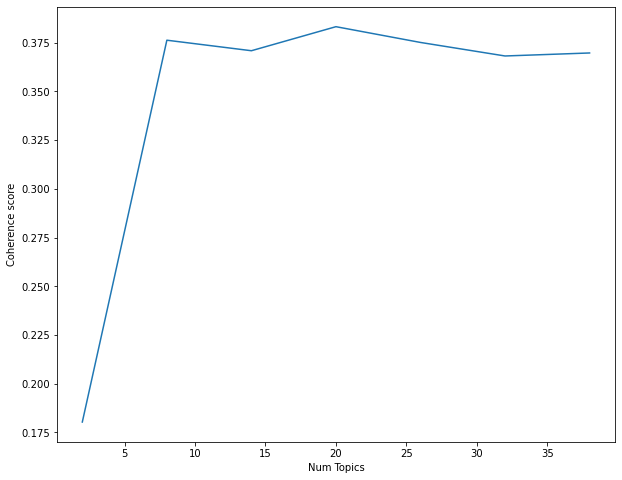

In [47]:
x = range(2, 40, 6)
plt.figure(figsize=(10, 8))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
plt.show()

In [48]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1803
Num Topics = 8  has Coherence Value of 0.3763
Num Topics = 14  has Coherence Value of 0.3709
Num Topics = 20  has Coherence Value of 0.3832
Num Topics = 26  has Coherence Value of 0.3752
Num Topics = 32  has Coherence Value of 0.3682
Num Topics = 38  has Coherence Value of 0.3698


Using Mallet, the coherence score for the 20-topic model increased (remember, Gensim’s standard model output 0.260). If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out.

In [49]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.032*"light" + 0.030*"dark" + 0.026*"window" + 0.021*"stand" + '
  '0.017*"high" + 0.017*"black" + 0.014*"tree" + 0.014*"red" + 0.014*"rise" + '
  '0.014*"water"'),
 (1,
  '0.091*"face" + 0.091*"eye" + 0.034*"long" + 0.027*"hair" + 0.026*"smile" + '
  '0.023*"mouth" + 0.020*"glass" + 0.019*"slightly" + 0.015*"white" + '
  '0.014*"nose"'),
 (2,
  '0.070*"door" + 0.055*"open" + 0.040*"room" + 0.031*"walk" + 0.030*"run" + '
  '0.023*"reach" + 0.022*"stand" + 0.021*"step" + 0.021*"front" + '
  '0.020*"past"'),
 (3,
  '0.063*"hand" + 0.036*"hold" + 0.030*"black" + 0.026*"long" + 0.025*"small" '
  '+ 0.021*"wear" + 0.020*"man" + 0.018*"robe" + 0.017*"finger" + '
  '0.014*"kreacher"'),
 (4,
  '0.109*"harry" + 0.080*"head" + 0.072*"turn" + 0.057*"make" + 0.028*"shake" '
  '+ 0.025*"side" + 0.021*"shout" + 0.021*"hard" + 0.016*"silence" + '
  '0.015*"hide"'),
 (5,
  '0.089*"snape" + 0.052*"professor" + 0.039*"lupin" + 0.030*"umbridge" + '
  '0.029*"professor_mcgonagall" + 0.023*"moody"

### Finding the dominant topic in each sentence
One of the practical application of topic modeling is to determine what topic a given document is about. To find that, we find the topic number that has the highest percentage contribution in that document.

In [51]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=ordered_jk_sentences):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=ordered_jk_sentences)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']



/var/folders/vv/q4cvdpxd5vb5y_ngs0c23mfw0000gn/T/ipykernel_12101/3251076958.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/vv/q4cvdpxd5vb5y_ngs0c23mfw0000gn/T/ipykernel_12101/3251076958.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [52]:
# Show
df_dominant_topic

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0                0              16              0.0702   
1                1              18              0.0686   
2                2              18              0.0823   
3                3               8              0.0776   
4                4              18              0.0828   
...            ...             ...                 ...   
95159        95159               3              0.1255   
95160        95160               0              0.0500   
95161        95161               3              0.0818   
95162        95162               0              0.0500   
95163        95163               0              0.0500   

                                                Keywords  \
0      harry, potter, give, good, great, dobby, uncle...   
1      year, people, house, make, die, father, friend...   
2      year, people, house, make, die, father, friend...   
3      time, day, night, student, find, hour, demento...   
4      year, people, house, make, die, father, friend...   
...                                                  ...   
95159  hand, hold, black, long, small, wear, man, rob...   
95160  light, dark, window, stand, high, black, tree,...   
95161  hand, hold, black, long, small, wear, man, rob...   
95162  light, dark, window, stand, high, black, tree,...   
95163  light, dark, window, stand, high, black, tree,...   

                                                    Text  
0                  Harry Potter and the Sorcerer's Stone  
1                                            CHAPTER ONE  
2                                      THE BOY WHO LIVED  
3      Mr and Mrs Dursley, of number four, Privet Dri...  
4       They were the last people you'd expect to be ...  
...                                                  ...  
95159   As Harry looked dat her, he lowered his hand ...  
95160                                     I know he will  
95161    The scar had not pained Harry for nineteen y...  
95162                                       All was well  
95163                                                     

[95164 rows x 5 columns]

### Find the most representative document for each topic

In [53]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]


In [54]:
# Show
sent_topics_sorteddf.head()

Topic_Num  Topic_Perc_Contrib  \
0          0              0.2740   
1          1              0.2522   
2          2              0.2688   
3          3              0.2395   
4          4              0.1496   

                                            Keywords  \
0  light, dark, window, stand, high, black, tree,...   
1  face, eye, long, hair, smile, mouth, glass, sl...   
2  door, open, room, walk, run, reach, stand, ste...   
3  hand, hold, black, long, small, wear, man, rob...   
4  harry, head, turn, make, shake, side, shout, h...   

                                                Text  
0   The tarnished chandeliers were no longer hung...  
1    Harry led them all back into the kitchen whe...  
2   He was walking down a deserted corridor towar...  
3    Kreacher belongs to Miss Bellatrix, oh yes, ...  
4     Not once, in over a thousand pages, does Ho...

### Topic distribution across documents

In [55]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']


In [56]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    pd.set_option('display.max_colwidth', -1)
    display(df_dominant_topics.head(20))


/var/folders/vv/q4cvdpxd5vb5y_ngs0c23mfw0000gn/T/ipykernel_12101/181230635.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Dominant_Topic  \
0   16               
1   18               
2   18               
3   8                
4   18               
5   0                
6   18               
7   1                
8   8                
9   16               
10  0                
11  7                
12  16               
13  18               
14  16               
15  16               
16  16               
17  0                
18  0                
19  16               

                                                               Topic_Keywords  \
0   harry, potter, give, good, great, dobby, uncle_vernon, bad, dudley, sir     
1   year, people, house, make, die, father, friend, mother, hope, stay          
2   year, people, house, make, die, father, friend, mother, hope, stay          
3   time, day, night, student, find, hour, dementor, place, morning, enter      
4   year, people, house, make, die, father, friend, mother, hope, stay          
5   light, dark, window, stand, high, black, tree, red, rise, water             
6   year, people, house, make, die, father, friend, mother, hope, stay          
7   face, eye, long, hair, smile, mouth, glass, slightly, white, nose           
8   time, day, night, student, find, hour, dementor, place, morning, enter      
9   harry, potter, give, good, great, dobby, uncle_vernon, bad, dudley, sir     
10  light, dark, window, stand, high, black, tree, red, rise, water             
11  voldemort, dumbledore, kill, life, order, body, mind, riddle, death, lord   
12  harry, potter, give, good, great, dobby, uncle_vernon, bad, dudley, sir     
13  year, people, house, make, die, father, friend, mother, hope, stay          
14  harry, potter, give, good, great, dobby, uncle_vernon, bad, dudley, sir     
15  harry, potter, give, good, great, dobby, uncle_vernon, bad, dudley, sir     
16  harry, potter, give, good, great, dobby, uncle_vernon, bad, dudley, sir     
17  light, dark, window, stand, high, black, tree, red, rise, water             
18  light, dark, window, stand, high, black, tree, red, rise, water             
19  harry, potter, give, good, great, dobby, uncle_vernon, bad, dudley, sir     

    Num_Documents  Perc_Documents  
0   31343.0        0.3294          
1   3840.0         0.0404          
2   3804.0         0.0400          
3   3211.0         0.0337          
4   3207.0         0.0337          
5   4616.0         0.0485          
6   3343.0         0.0351          
7   4060.0         0.0427          
8   3427.0         0.0360          
9   3854.0         0.0405          
10  3032.0         0.0319          
11  3363.0         0.0353          
12  3298.0         0.0347          
13  3811.0         0.0400          
14  2550.0         0.0268          
15  2808.0         0.0295          
16  2832.0         0.0298          
17  2779.0         0.0292          
18  3164.0         0.0332          
19  2822.0         0.0297

## Bayesian simulation

In [57]:
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in tqdm(paragraphs):
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para


In [58]:
team_voldemort=['draco','voldemort','snape','lucius','sirius','bellatrix']
team_harry=['ron','hermione','dumbledore','hagrid','neville']

In [59]:
hero_characteristics=['brave','loyal','caring','kind','honest','smart','friend','family','heroic','good','celebrate','happy','hoping','fear','promise','angry','shock']

In [60]:
characteristics_occurance= get_any_words_paragraphs(potter_df['Sentence2'], hero_characteristics)

100%|█████████████████████████████████| 70802/70802 [00:00<00:00, 262331.80it/s]


In [61]:
friends_occurance= get_any_words_paragraphs(potter_df['Sentence2'], team_harry)
enemy_occurance=get_any_words_paragraphs(potter_df['Sentence2'], team_voldemort)

100%|█████████████████████████████████| 70802/70802 [00:00<00:00, 728895.41it/s]


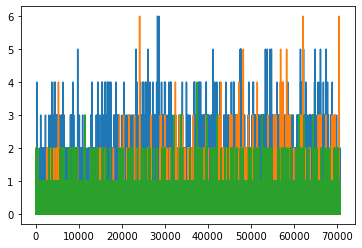

In [62]:
plt.plot(friends_occurance)
plt.plot(enemy_occurance)
plt.plot(characteristics_occurance)

In [63]:
bool_friends_occurences = [bool(v) for v in friends_occurance]
bool_enemy_occurences = [bool(v) for v in enemy_occurance]
df_characteristics = pd.DataFrame(list(zip(characteristics_occurance, friends_occurance, enemy_occurance)), 
                        columns =['characteristics', 'friends', 'enemy'])
df_characteristics

characteristics  friends  enemy
0      0                0        0    
1      0                0        0    
2      0                0        0    
3      0                0        0    
4      0                0        0    
...   ..               ..       ..    
70797  0                0        0    
70798  0                0        0    
70799  0                0        0    
70800  0                0        0    
70801  0                0        0    

[70802 rows x 3 columns]

In [64]:
df_characteristics2 = pd.DataFrame(list(zip(characteristics_occurance, bool_friends_occurences, bool_enemy_occurences)), 
                        columns =['characteristics', 'friends', 'enemy'])

In [65]:
fml = 'characteristics ~ friends + enemy + friends:enemy'

In [66]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, var_names=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,var_names=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, var_names=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [67]:
df_characteristics2

characteristics  friends  enemy
0      0                False    False
1      0                False    False
2      0                False    False
3      0                False    False
4      0                False    False
...   ..                  ...      ...
70797  0                False    False
70798  0                False    False
70799  0                False    False
70800  0                False    False
70801  0                False    False

[70802 rows x 3 columns]

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


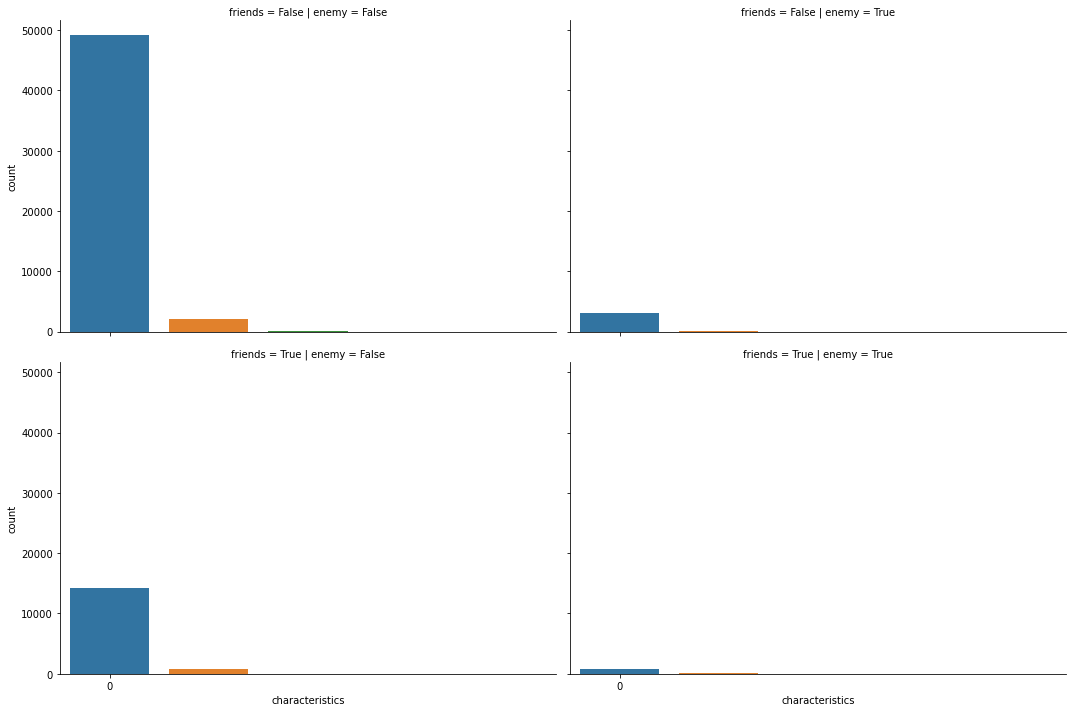

In [68]:
g = sns.factorplot(x='characteristics', row='friends', col='enemy', data=df_characteristics2, kind='count', aspect=1.5)

# Make x-axis ticklabels less crowded
ax = g.axes[1, 0]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5]);

In [69]:
df_characteristics2.groupby(['friends', 'enemy'])['characteristics'].agg(['mean', 'var'])

mean       var
friends enemy                    
False   False  0.046894  0.049593
        True   0.061497  0.067837
True    False  0.058691  0.063975
        True   0.074205  0.073497

#### Since the mean and variance of a Poisson distributed random variable are equal, the sample means and variances are very close.

In [70]:
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_characteristics2, family=pm.glm.families.Poisson())

    trace = pm.sample(4000, cores=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.com

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.com

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.com

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.com

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.com

/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.com

Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 113 seconds.
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20;

In [78]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

['Intercept',
 'friends[T.True]',
 'enemy[T.True]',
 'friends[T.True]:enemy[T.True]',
 'mu']

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/var/folders/vv/q4cvdpxd5vb5y_ngs0c23mfw0000gn/T/ipykernel_2888/3456475131.py:8: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(trcs, var_names=varnames, figsize=(12,nrows*1.4),
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future r

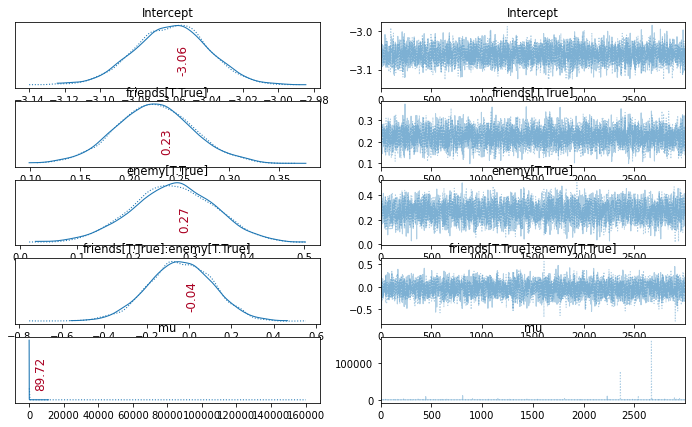

In [79]:
plot_traces(trace[1000:], varnames=rvs)

In [80]:
np.exp(pm.summary(trace[1000:], var_names=rvs))

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


mean        sd    hdi_3%       hdi_97%  \
Intercept                      4.688770e-02  1.021222  0.045049  4.865503e-02   
friends[T.True]                1.252323e+00  1.039770  1.162997  1.348510e+00   
enemy[T.True]                  1.308655e+00  1.074655  1.139968  1.494811e+00   
friends[T.True]:enemy[T.True]  9.598291e-01  1.164160  0.727603  1.282742e+00   
mu                             9.260578e+38       inf  1.003005  1.489843e+45   

                                  mcse_mean       mcse_sd  ess_bulk  ess_tail  \
Intercept                      1.000000e+00  1.000000e+00       inf       inf   
friends[T.True]                1.001001e+00  1.000000e+00       inf       inf   
enemy[T.True]                  1.001001e+00  1.001001e+00       inf       inf   
friends[T.True]:enemy[T.True]  1.002002e+00  1.002002e+00       inf       inf   
mu                             2.540584e+13  3.015405e+09       inf       inf   

                                  r_hat  
Intercept                      2.718282  
friends[T.True]                2.718282  
enemy[T.True]                  2.718282  
friends[T.True]:enemy[T.True]  2.718282  
mu                             2.718282

In [82]:
np.exp(pm.summary(trace[1000:], var_names=rvs)[['mean','hdi_3%','hdi_97%']])

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    hdi_3%       hdi_97%
Intercept                      4.688770e-02  0.045049  4.865503e-02
friends[T.True]                1.252323e+00  1.162997  1.348510e+00
enemy[T.True]                  1.308655e+00  1.139968  1.494811e+00
friends[T.True]:enemy[T.True]  9.598291e-01  0.727603  1.282742e+00
mu                             9.260578e+38  1.003005  1.489843e+45

In [83]:
np.percentile(trace[1000:]['mu'], [25,50,75])

array([ 4.16054005,  9.99970782, 22.95971363])

## Sentimental Analysis

In [179]:
# Import the SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Creat the variable sa to hold the VADER lexicon object 
sa = SentimentIntensityAnalyzer()


In [180]:
sentences_sentiment_scores = []
for s in jk_sentences:
    scores = sa.polarity_scores(s)
    sentences_sentiment_scores.append(scores)

In [181]:
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack

In [184]:
book_size=dict()
i=1
for book in books:
    book_size['Book'+str(i)]=len(book)
    i=i+1

[Text(0.5, 1.0, 'Total no. of Sentences')]

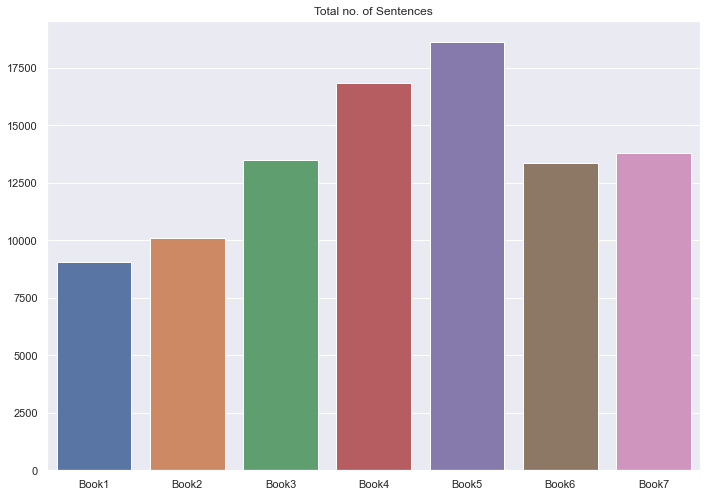

In [230]:
keys = list(book_size.keys())
# get values in the same order as keys, and parse percentage values
vals = [book_size[k] for k in keys]
sns.barplot(x=keys, y=vals).set(title='Total no. of Sentences')

#### The fifth book i.e. Harry Potter and the Order of the Phoenix is the longest book of the series while first book i.e. Harry Potter and the Sorcerer's Stone is the shortest one. 

In [186]:
overall_score=[]
for book in books:
    sentences_sentiment_scores = []
    for s in book:
        scores = sa.polarity_scores(s)
        sentences_sentiment_scores.append(scores)
    overall_score.append(sentences_sentiment_scores)

In [187]:
def low_pass(s, threshold=2e4):
    fourier = rfft(s)
    #frequencies = rfftfreq(s.size, d=2e-3 / s.size)
    frequencies = rfftfreq(len(s), d=2e-3 / len(s))
    display(1/frequencies)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [188]:
books_sentiment=[]
for book_score in  overall_score:
    book_sentiment = [s['compound'] for s in book_score]
    book_sentiment = low_pass(book_sentiment)
    books_sentiment.append(book_sentiment)

/var/folders/vv/q4cvdpxd5vb5y_ngs0c23mfw0000gn/T/ipykernel_2630/164465499.py:5: RuntimeWarning: divide by zero encountered in true_divide
  display(1/frequencies)


array([           inf, 2.00000000e-03, 1.00000000e-03, ...,
       4.42575791e-07, 4.42477876e-07, 4.42380004e-07])

array([           inf, 2.00000000e-03, 1.00000000e-03, ...,
       3.97219464e-07, 3.97140588e-07, 3.97061743e-07])

array([           inf, 2.00000000e-03, 1.00000000e-03, ...,
       2.96956199e-07, 2.96912114e-07, 2.96868042e-07])

array([           inf, 2.00000000e-03, 1.00000000e-03, ...,
       2.37953599e-07, 2.37925291e-07, 2.37896991e-07])

array([           inf, 2.00000000e-03, 1.00000000e-03, ...,
       2.15053763e-07, 2.15030642e-07, 2.15007525e-07])

array([           inf, 2.00000000e-03, 1.00000000e-03, ...,
       2.99850075e-07, 2.99805127e-07, 2.99760192e-07])

array([           inf, 2.00000000e-03, 1.00000000e-03, ...,
       2.89771081e-07, 2.89729103e-07, 2.89687138e-07])

In [189]:
bookLabel=["Harry Potter and the Sorcerer's Stone","Harry Potter and the Chamber of Secrets",
"Harry Potter and the Prisoner of Azkaban","Harry Potter and the Goblet of Fire",
"Harry Potter and the Order of the Phoenix","Harry Potter and the Half Blood Prince"
,"Harry Potter and the Deathly Hallows "]

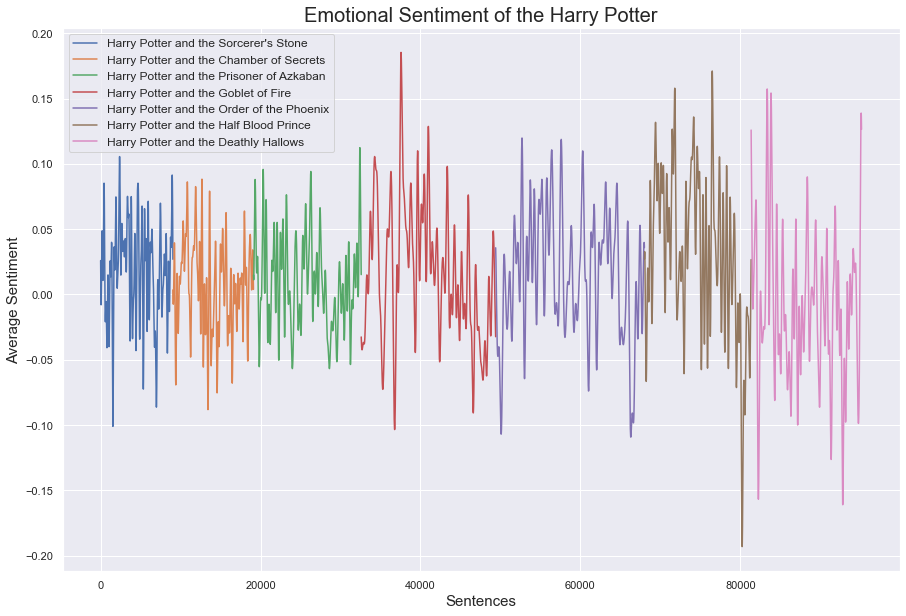

In [235]:
prev_length=0
i=0
plt.figure(figsize=(15, 10))
for score in books_sentiment:
    length= len(score)
    x = np.linspace(prev_length, prev_length+length - 1,num=length)
    y = [i for i in score]
    prev_length=prev_length+length
    plt.plot(x,y,label=bookLabel[i])
    i=i+1

plt.grid('true')
plt.legend(loc='best', fontsize=12)
plt.title('Emotional Sentiment of the Harry Potter', fontsize=20)
plt.xlabel('Sentences', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()

### The greatest positive spike is when Harry is chosen by the Goblet of Fire in Book 4 (Harry Potter and the Goblet of Fire) and the greatest negative spike is Dumbledore’s death in Book 5 (Harry Potter and the Half Blood Prince). 

## Analyzing the Spells

In [25]:
spells=['patronum','accio','expelliarmus','stupefy','lumos','imperio','crucio','avada kedavra']
spells = [x.lower() for x in spells]
books_val = []

for x in books:
    for y in x:
        s = " "
        s = s.join(y)
        s = s.lower()
        s = re.sub('[^a-zA-Z]+\s', '', s)
        s = s.split(',')
    books_val.append(s)

In [26]:
for x in spells:
    if x in collections.Counter(books_val[4]).keys():
        print(x,collections.Counter(books_val[4])[x])

In [27]:
spells

['patronum',
 'accio',
 'expelliarmus',
 'stupefy',
 'lumos',
 'imperio',
 'crucio',
 'avada kedavra']

In [29]:
collections.Counter()

Counter()

In [30]:
books_val = []
for x in books:
    w  = []
    s = ""
    for y in x:
        y = y.lower()
        y = re.sub('[^a-zA-Z]+\s+', ' ', y)
        y = y.strip()
        w.append(y)
    s = " ".join(w)
    books_val.append(s)

In [31]:
spell_counts=[]
for i in range(len(books)):
    spell_dict={'patronum':0,'accio':0,'expelliarmus':0,'stupefy':0,'lumos':0,'imperio':0,'crucio':0,'avada kedavra':0}
    for x in spells:
        if x in collections.Counter(books_val[i].split()).keys():
            spell_dict[x]= collections.Counter(books_val[i].split())[x]
    spell_counts.append(spell_dict)

In [32]:
spell_counts

[{'patronum': 0,
  'accio': 0,
  'expelliarmus': 0,
  'stupefy': 0,
  'lumos': 0,
  'imperio': 0,
  'crucio': 0,
  'avada kedavra': 0},
 {'patronum': 0,
  'accio': 0,
  'expelliarmus': 3,
  'stupefy': 0,
  'lumos': 2,
  'imperio': 0,
  'crucio': 0,
  'avada kedavra': 0},
 {'patronum': 26,
  'accio': 0,
  'expelliarmus': 4,
  'stupefy': 0,
  'lumos': 4,
  'imperio': 0,
  'crucio': 0,
  'avada kedavra': 0},
 {'patronum': 1,
  'accio': 8,
  'expelliarmus': 3,
  'stupefy': 9,
  'lumos': 4,
  'imperio': 1,
  'crucio': 5,
  'avada kedavra': 0},
 {'patronum': 4,
  'accio': 9,
  'expelliarmus': 7,
  'stupefy': 7,
  'lumos': 2,
  'imperio': 0,
  'crucio': 4,
  'avada kedavra': 0},
 {'patronum': 0,
  'accio': 2,
  'expelliarmus': 1,
  'stupefy': 1,
  'lumos': 3,
  'imperio': 0,
  'crucio': 2,
  'avada kedavra': 0},
 {'patronum': 6,
  'accio': 12,
  'expelliarmus': 8,
  'stupefy': 9,
  'lumos': 6,
  'imperio': 5,
  'crucio': 4,
  'avada kedavra': 0}]

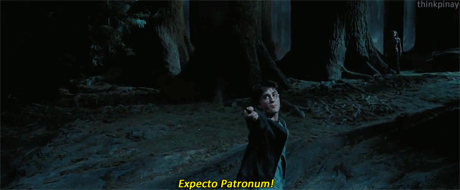

/var/folders/vv/q4cvdpxd5vb5y_ngs0c23mfw0000gn/T/ipykernel_2888/2813508749.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(spell_counts, ignore_index=True, sort=False)


<AxesSubplot:>

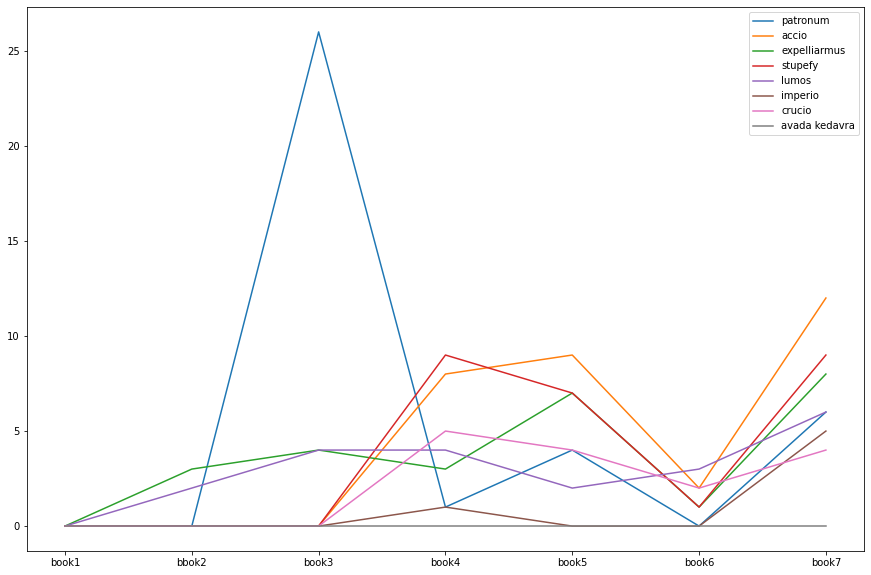

In [35]:
df = pd.DataFrame()
df = df.append(spell_counts, ignore_index=True, sort=False)
index1 = ['book1','bbok2','book3','book4','book5','book6','book7']
df.index = index1
df.plot(figsize=(15, 10))

#### The most frequently used spell across the series in Expecto Patronum. 

In [308]:
chapterindex_=[]
for sentence in book7:
    if 'CHAPTER' in sentence:
        chapterindex_.append(book7.index(sentence))

In [72]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


In [ ]:
language = "english"

parser = PlaintextParser(chapters[0], Tokenizer(language))

In [56]:
from sumy.summarizers.text_rank import TextRankSummarizer
summarizer_3 = TextRankSummarizer(Stemmer(language))
summarizer_3.stop_words = get_stop_words(language)
summary_3 = summarizer_3(parser.document, 1)
for sentence in summary_3:
    print(sentence)


CHAPTER ONETHE BOY WHO LIVEDMr and Mrs Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsenseMr Dursley was the director of a firm called Grunnings, which made drills He was a big, beefy man with hardly any neck, although he did have a very large mustache Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhereThe Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it They didn't think they could bear it if anyone found out about the Potters Mrs Potter was Mrs Dursley's sister, but they hadn't met for s